
# Gender Difference in Suicide Rates - Analysis
Navina Amuthan


# 1. Introduction
Awareness of the high male suicide rate has increased in recent years ([BBC article](https://www.bbc.com/future/article/20190313-why-more-men-kill-themselves-than-women)) and this trend has been highlighted in research ([Bertolote & Fleischmann, 2002](https://www.iasp.info/pdf/papers/Bertolote.pdf), [Levi et al., 2003](https://watermark.silverchair.com/130097.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAocwggKDBgkqhkiG9w0BBwagggJ0MIICcAIBADCCAmkGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMYsMCa4c7MVaQBv81AgEQgIICOtQlLtGVcHmMigHoIvIAu4PtRKhMtIaVIge1wV3x__jCrZ7rDl4mEpSRpeO9O78O4NQGxFnxA-c6-RVXks24H1McBQP8qlNu8gnbbxbFBJ7vDbarZGCdoITWhjrQBN8ZtMn19ZGp3GOGUpxwcYBfjnQqZOYzLF03EVYvmwnM4nz_WqS23gJvfyJvaB4DY1vcqew1Va8GLE0jWzwmrB4vHluJdYq2XubkWSzPnufPUBlFzVC4jxmn0XoBCQD0wENt2DLrkkP3_K44lJ34iW3OxgcCvmDEXGbR62TZqH8WPW1hurId8qcZqxQM9M3NwJ681287nL4xFyF1dnLrp9Xu_tEo_kWzxQcqm3kDbmaVRW95JVGnFwemJtWhOZr6V9RnTbZKjitAt7d5mEg3T1ASbwnZKhXvP7dTnQ0l4aVrFG4JVN3PzV2DQpX5c-ca-Z7JXNy7a8Xd54NT_TPdzKBK8YRMEgtXmCbzwvRDInaZlqLBSHPV8DHDe-tqbuZBL9IUCkgGckpFFZeSeqtUPbL-rkp52EYRlhXnrsInNpJlv4NXvUaM2M1GJmW33WumLgEb21d-HEYguYqmCb4ISEHc4rVbEEBObwxeA5XGD0uDxzr2Cvwfdsg8XzNd1lqkwH-W3SYUNyKbClkSHyjcPBWhHnuyTRTGzyBIAwKffki9DRDtrYWwivJHZSYXP3U0rPIP4Uzos2V1qeXm1UIIZKMv6q58G7A1hg4yiiVinXb7jr0XV3jhAvjN7pInmg), [Värnik, 2012](https://www.mdpi.com/1660-4601/9/3/760/htm)). This dataset offers an opportunity to analyse if there are differences between the female and male suicide rate, as well as what factors may influence the number of suicides *within* and *between* the sexes.
## 1.1 Import data
The [dataset](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016) for this analysis is sourced from the United Nations Development Program, the World Bank and the World Health Organisation.

In [1]:
# activate required libraries
library(tidyverse)
library(dplyr)
library(gridExtra)
library(data.table)
library(car)
library(ggrepel)

# import data
suicide_data = read_csv("../input/suicide-rates-overview-1985-to-2016/master.csv")



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.1          ✔ dplyr   0.8.5     
✔ tidyr   1.0.3          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Parsed with column specification:
cols(
  country = col_character(),
  year = col_double(

## 1.2 Tidy data
Let's look at the first few rows of data:

In [2]:
# give an overview of the data
head(suicide_data)

country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NA,2156624900,796,Generation X
Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NA,2156624900,796,Silent
Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NA,2156624900,796,Generation X
Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NA,2156624900,796,G.I. Generation
Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NA,2156624900,796,Boomers
Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NA,2156624900,796,G.I. Generation


12 variables but some are less useful than others, including 'country-year' and 'generation' 
In addition, some of the variable names could be altered, and the age variable needs to be ordered properly.

In [3]:
# rename some variables
colnames(suicide_data)[10] = 'gdp_for_year'
colnames(suicide_data)[11] = 'gdp_per_capita'

# age groups need to be ordered
suicide_data$age <- factor(suicide_data$age, ordered = T,
                           levels = c('5-14 years',
                                      '15-24 years', 
                                      '25-34 years', 
                                      '35-54 years', 
                                      '55-74 years', 
                                      '75+ years'))

Next I shall see if there are any missing data:

In [4]:
# are any data missing?
sum(is.na(suicide_data)) 

[1] 19456

There are **19456** missing values, so which variables are missing data?

In [5]:
# function outlining which variables have missing data
for(i in 1:12) {
  cat('Variable', i, 'is missing', sum(is.na(suicide_data[i])), 'values \n')
}

Variable 1 is missing 0 values 
Variable 2 is missing 0 values 
Variable 3 is missing 0 values 
Variable 4 is missing 0 values 
Variable 5 is missing 0 values 
Variable 6 is missing 0 values 
Variable 7 is missing 0 values 
Variable 8 is missing 0 values 
Variable 9 is missing 19456 values 
Variable 10 is missing 0 values 
Variable 11 is missing 0 values 
Variable 12 is missing 0 values 


Variable 9, the Human Development Index for a given year, is the only variable missing data. Therefore, it is removed because it is missing 70% of the total data.

In [6]:
# update suicide_data with variable 9 removed
suicide_data = suicide_data[-9]

Next I'm going to check that each year has enough data:

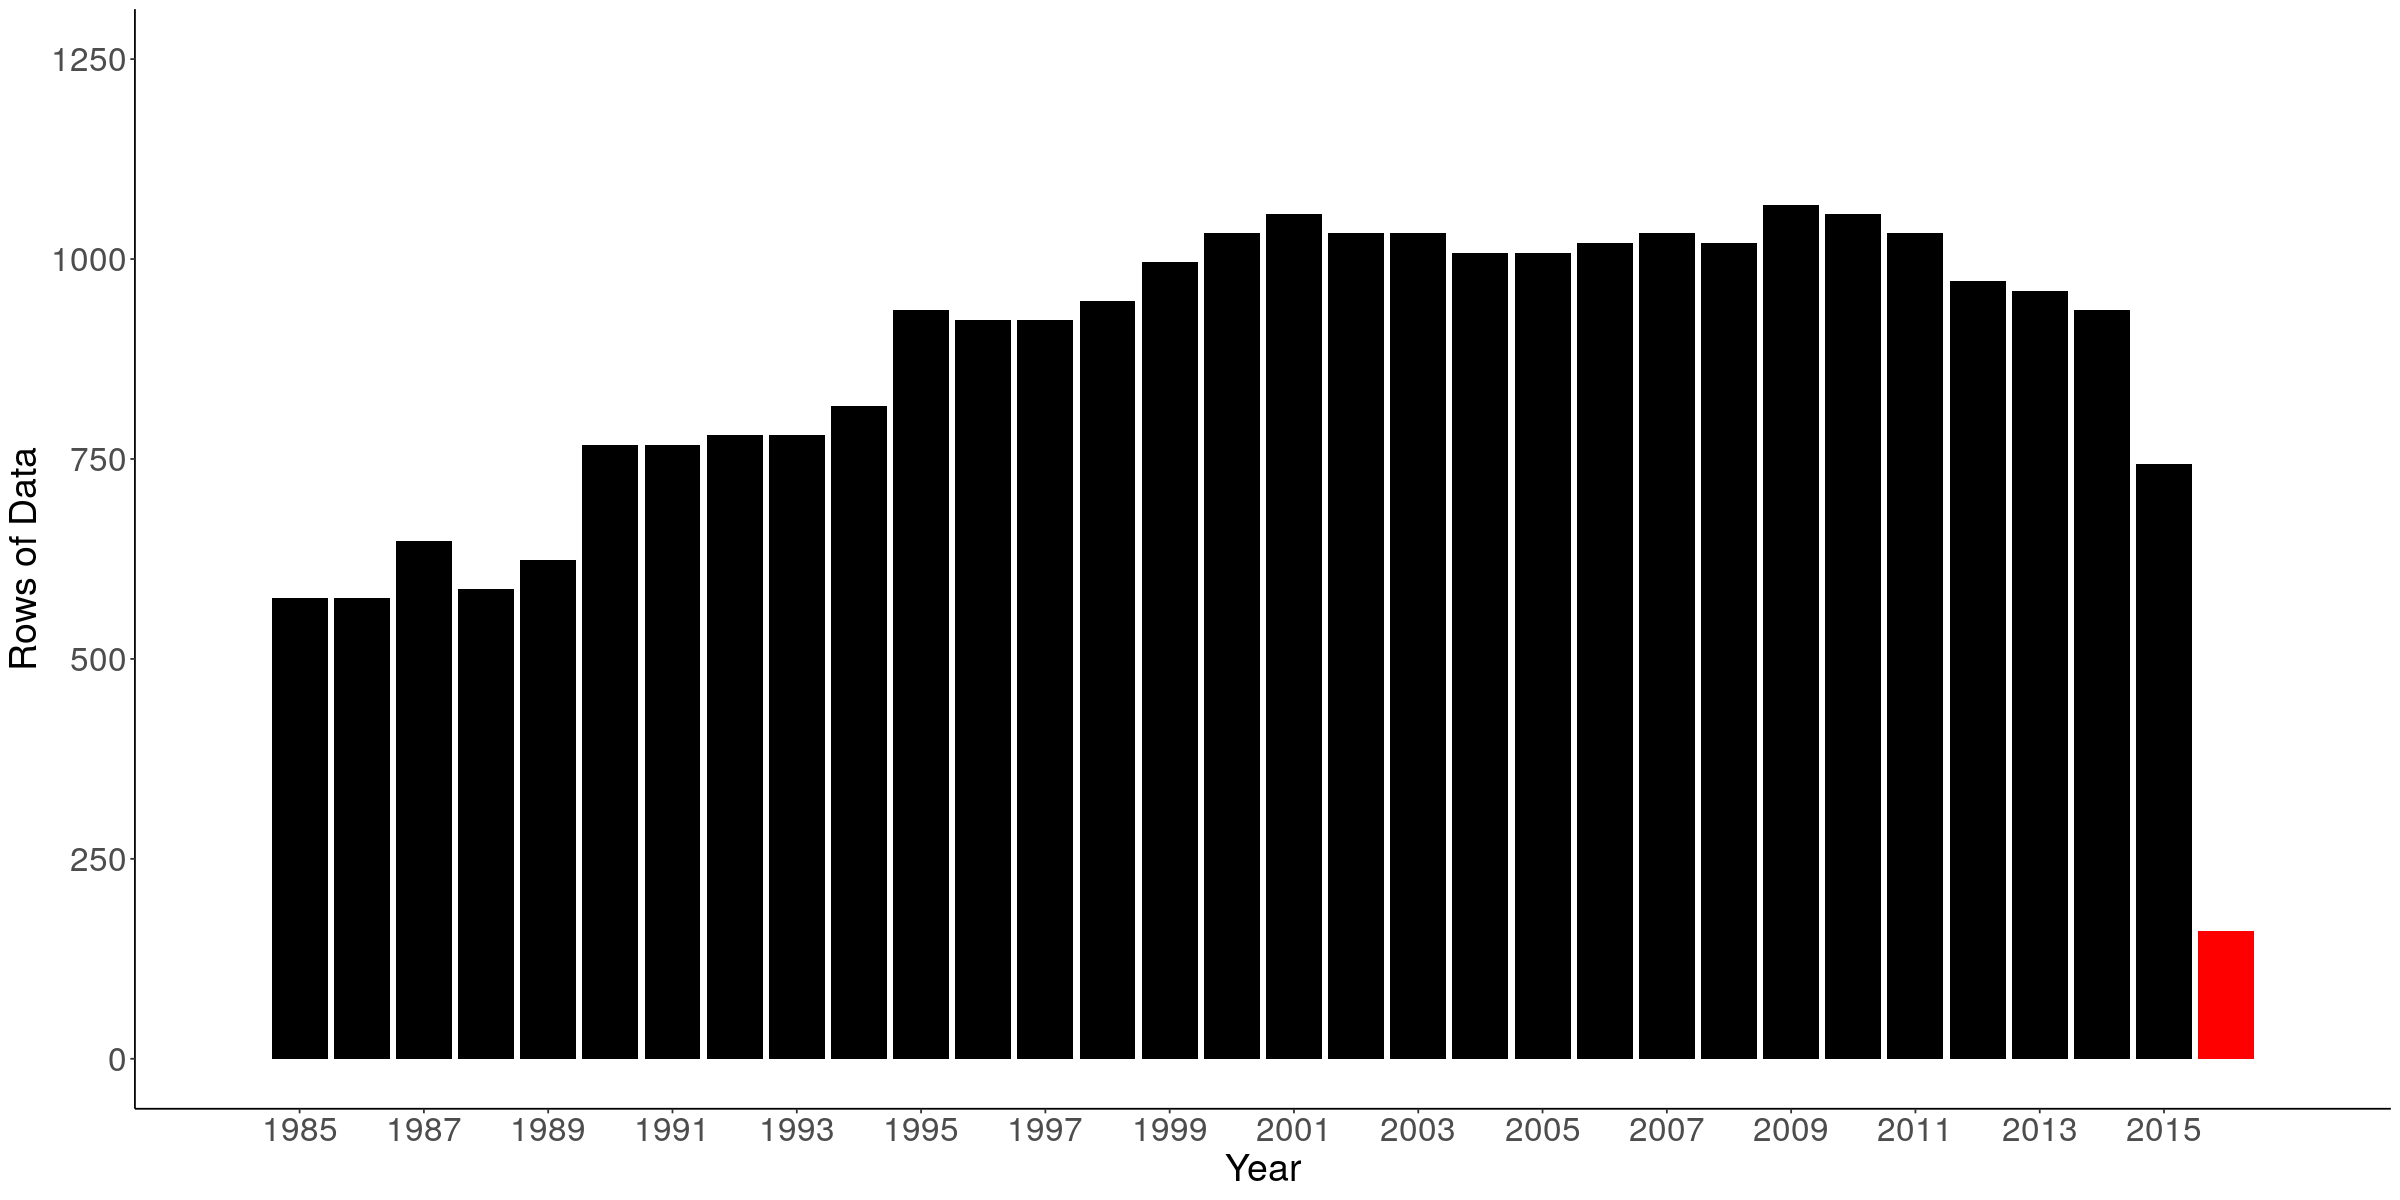

In [7]:
# is there enough data available for each year
years <- suicide_data %>% # using suicide_data
  group_by(year) %>% # group all the data from the same year
  dplyr::summarise(rows = n()) # collate the number of rows for each year
# drop in rows from 744 to 160 from 2015 to 2016

plot_years_theme <- theme(axis.title = element_text(size = 22.5), 
                          axis.text = element_text(size = 20))
plot_years <- ggplot(data = years, 
                     aes(x = year, y = rows,
                         fill = factor(ifelse(year == '2016',
                                              'Highlighted',
                                              'Normal')))) +
  # fill ifelse separates 2016 and allows it to be coloured red
  geom_bar(stat = 'identity', show.legend = F) + # create bar chart,
  # remove legend
  theme_classic() + # white background, no gridlines
  xlab('Year') + # change x axis label
  ylab('Rows of Data') + # change y axis label
  plot_years_theme + # change the size of axis titles and axis text
  scale_x_continuous(breaks = c(seq(1985, 2016, 2)),
                     labels = c(seq(1985, 2016, 2)),
                     limits = c(1984, 2017)) +
  scale_y_continuous(breaks = c(seq(0, 1250, 250)),
                     labels = c(seq(0, 1250, 250)),
                     limits = c(0, 1250)) +
  # change x and y axis labels
  scale_fill_manual(name = 'year', values = c('red', 'black'))
  # fill every bar black, except in 2016 which is red
options(repr.plot.width = 20, repr.plot.height = 10)
plot_years

You can see that the final year in this dataset (*coloured in red*) has much less data than the other years, so it is removed.
Furthermore, I am also going to remove countries which have less than 10 years of data.

In [8]:
# therefore remove 2016
suicide_data <- subset(suicide_data, subset = year < 2016)

# identify the number of years of data each country has
minimum_years <- suicide_data %>% # using suicide_data
  group_by(country) %>% # group all the data from the same country
  dplyr::summarise(rows = n(), years = rows / 12) %>% # collate number of rows 
  # for each country, with second column denoting the number of years
  # worth of data for each country
  arrange(years) # arrange the table by years (ascending)

# remove countries with less than 10 years of data
suicide_data <- suicide_data %>% # using suicide_data
  filter(!(country %in% head(minimum_years$country, 10))) # remove the 
  # countries that are in the first 10 rows of the minimum_years table

# to check they have been removed correctly
# minimum_years10 <- data %>%
#   group_by(country) %>%
#   summarise(rows = n(), 
#             years = rows / 12) %>%
#   arrange(years)

# 2. Exploratory Data Analysis
I am going to some initial data visualisation to understand what the trends of the data are, before moving on to some statistical analysis.

## 2.1 Change in suicide rate per 100k population
Firstly, I am going to plot the change in the mean number of suicides per 100k population:

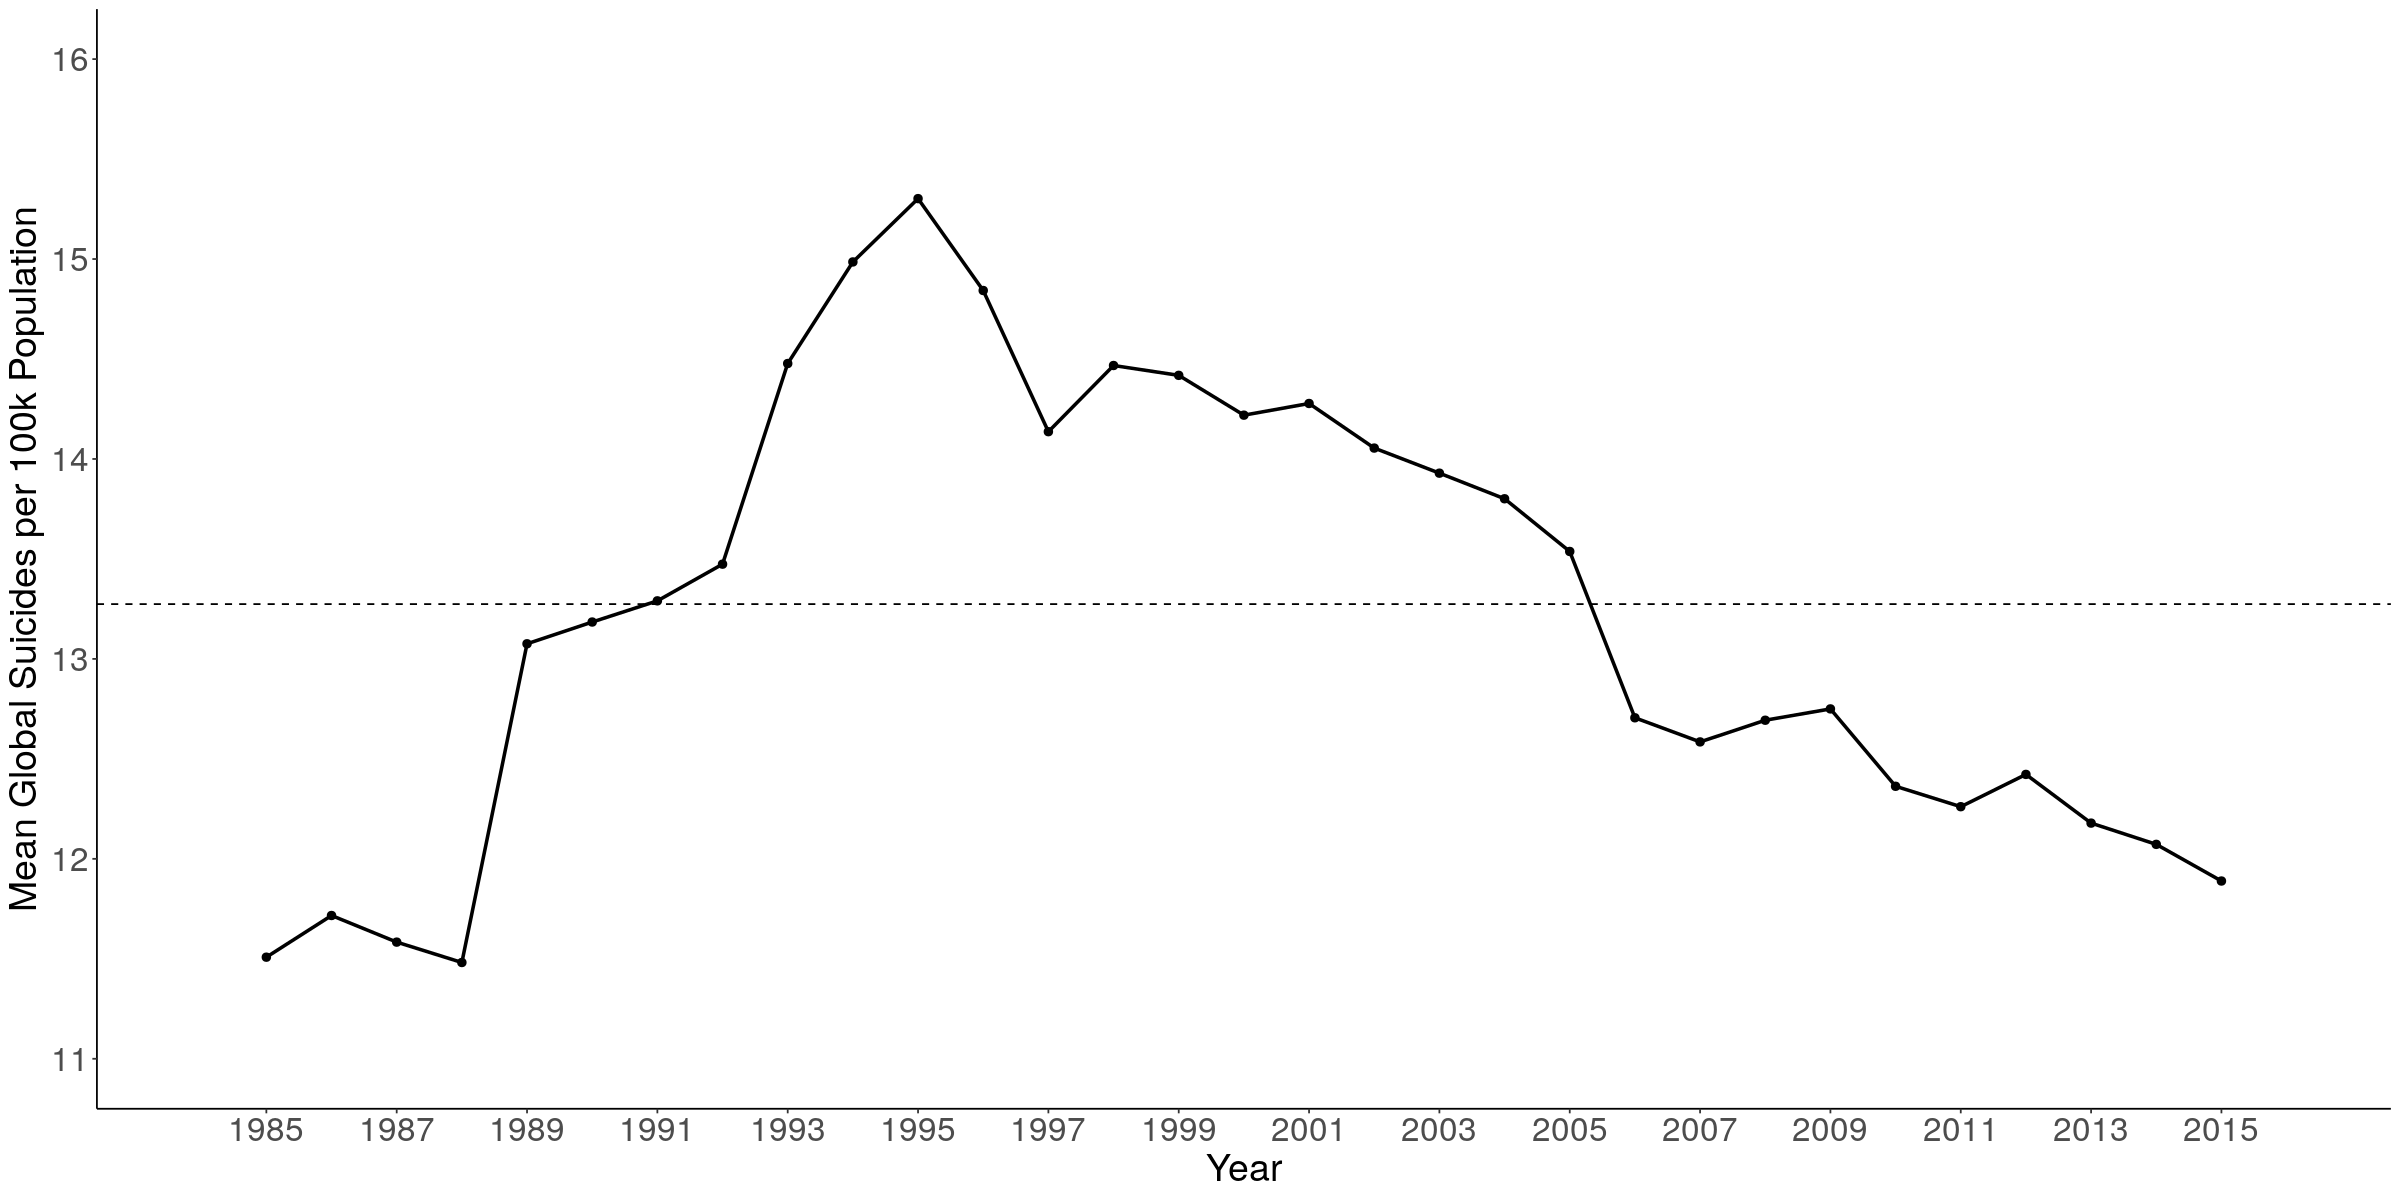

In [9]:
# look at how global suicides per 100k population have changed
# calculate the global mean
global_mean = (sum(as.numeric(suicide_data$suicides_no)) / 
                 sum(as.numeric(suicide_data$population))) * 100000
suicides_global = suicide_data %>% # using suicide_data
  group_by(year) %>% # group all the data from the same year
  dplyr::summarise(population = sum(population), 
            suicides = sum(suicides_no), 
            suicides_per_100k = (suicides / population) * 100000)
  # create rows with the sum of the global population, sum of suicides,
  # and the suicides per 100k population, for each year

plot_global_theme <- theme(axis.title = element_text(size = 22.5), 
                           axis.text = element_text(size = 20))
plot_global <- ggplot(data = suicides_global, 
                      aes(x = year, y = suicides_per_100k)) +
  geom_point(lwd = 2) +
  # add data as points
  geom_line(lwd = 1) +
  # join points together
  geom_hline(yintercept = global_mean, linetype = 2) +
  # add horizontal line denoting the global mean for the period
  theme_classic() + # white background, no gridlines
  xlab('Year') + # change x axis label
  ylab('Mean Global Suicides per 100k Population') + 
  # change y axis label
  plot_global_theme + # change the size of axis titles and axis text
  scale_x_continuous(breaks = c(seq(1985, 2015, 2)),
                     labels = c(seq(1985, 2015, 2)),
                     limits = c(1984, 2016)) +
  scale_y_continuous(breaks = c(seq(11, 16, 1)),
                     labels = c(seq(11, 16, 1)),
                     limits = c(11, 16))
  # change x and y axis values

options(repr.plot.width = 20, repr.plot.height = 10)
plot_global

The dashed line indicates the global mean for the time period: **13.27**.

Interpretation:
* Suicide rate was relatively **low** for the first four years, then **increases substantially**,
* Suicide rate increases steadily over from 1899-1992, then **increases substantially again** over the next three years to a **peak of 15.3 in 1995**,
* Since 1995, the suicide rate has **generally fallen** and may reach the early low level in the next decade.

## 2.2 Differences between the sexes
Next I want to see how the suicide rate differs between the sexes.

### 2.2.1 Global differences
Let's see how the total number of suicides across all countries differs between the sexes as well as how the mean number of suicides per 100k population changes over time:

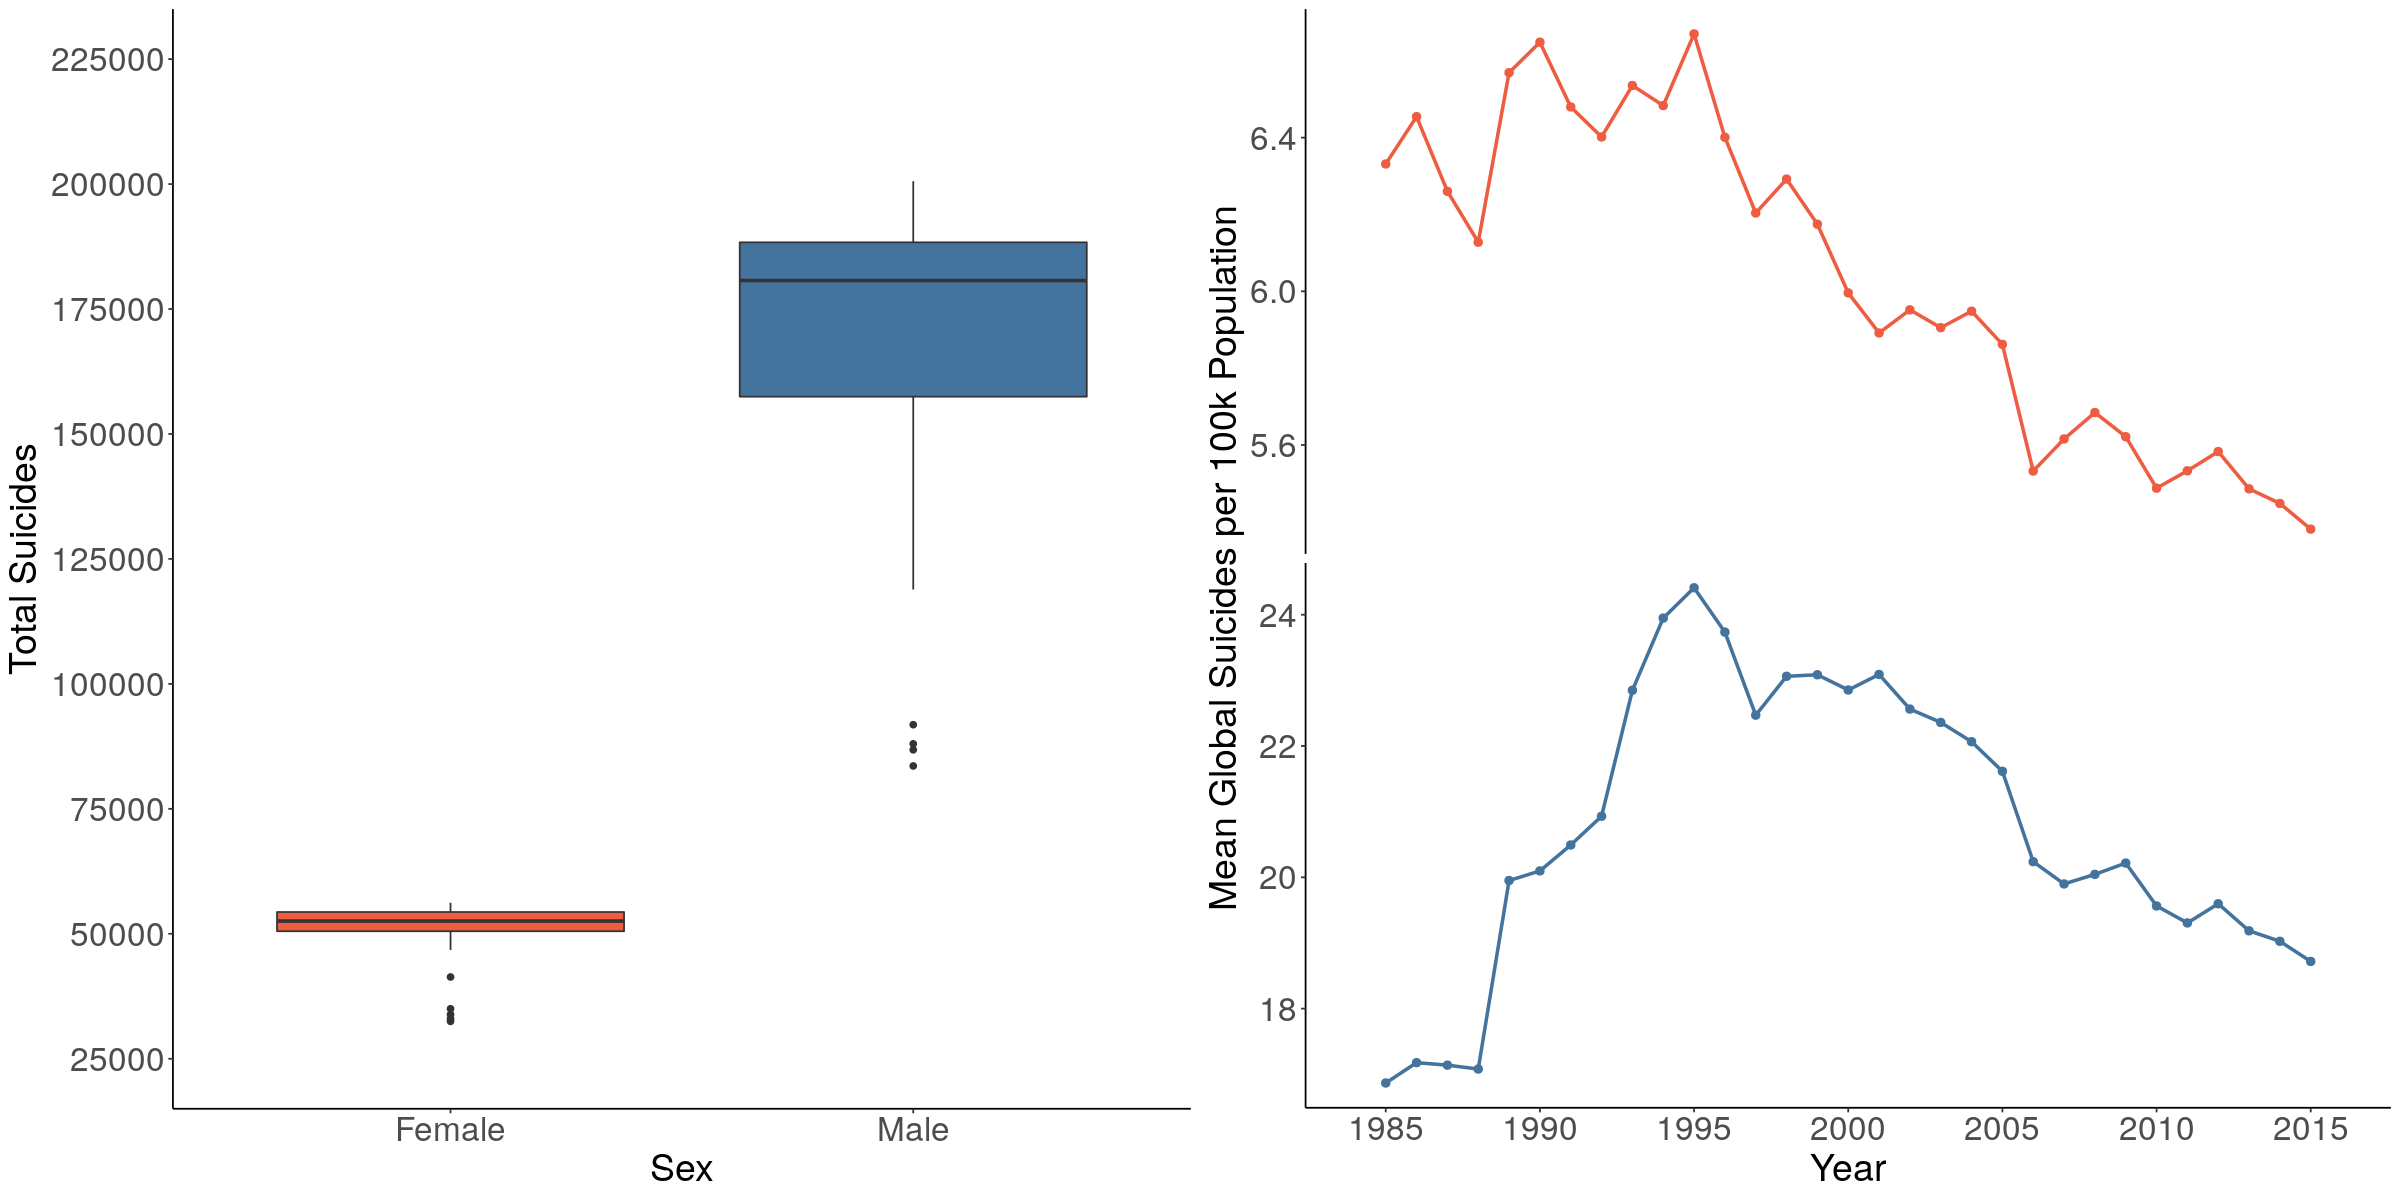

In [10]:
# differences between the sexes for global suicides
suicides_sex = suicide_data %>% # using suicide_data
  group_by(year, sex) %>% # group all the data from the same year and sex
  dplyr::summarise(population = sum(as.numeric(population)), 
            suicides = sum(as.numeric(suicides_no)))
# create rows with the sum of the global population and the sum of 
# global suicides

plot_sex_theme <- theme(axis.title = element_text(size = 22.5), 
                        axis.text = element_text(size = 20),
                        legend.position = 'none')
options(scipen = 250000) # remove scientific notation
plot_sex <- ggplot(data = suicides_sex, aes(x = sex, y = suicides,
                                            fill = sex)) +
  geom_boxplot() + # create bar chart
  theme_classic() + # white background, no gridlines
  xlab('Sex') + # change x axis label
  ylab('Total Suicides') + # change y axis label
  plot_sex_theme + # change the size of axis titles, axis text
  # and remove legend
  scale_x_discrete(labels = c('Female', 'Male')) +
  scale_y_continuous(breaks = c(seq(25000, 225000, 25000)),
                     labels = c(seq(25000, 225000, 25000)),
                     limits = c(25000, 225000)) +
  # change x and y labels
  scale_fill_manual(values = c('tomato2', '#44749D'))
  # change fill colour for bars, female then male

# differences between the sexes over time
suicides_sex_years = suicide_data %>% # using suicide_data
  group_by(year, sex) %>% # group all the data from the same year and sex
  dplyr::summarise(population = sum(as.numeric(population)), 
            suicides = sum(as.numeric(suicides_no)), 
            suicides_per_100k = (suicides / population) * 100000)
# create rows with the sum of the global population, sum of suicides,
# and the suicides per 100k population, for each sex

plot_sex_years_theme <- theme(axis.title = element_text(size = 22.5), 
                        axis.text = element_text(size = 20),
                        legend.position = 'none',
                        strip.background = element_blank(),
                        strip.text = element_blank())
plot_sex_years <- ggplot(data = suicides_sex_years, 
                         aes(x = year, y = suicides_per_100k, 
                             col = sex)) +
  facet_grid(sex ~ ., scales = 'free_y') +
  # create a grid of two graphs split by sex, with the y axis set to
  # free, in which the scale is automatically calculated
  geom_point(lwd = 2) +
  # add data as points
  geom_line(lwd = 1) +
  # join points together
  theme_classic() + # white background, no gridlines
  xlab('Year') + # change x axis label
  ylab('Mean Global Suicides per 100k Population') + # change y axis label
  plot_sex_years_theme + # change the size of axis titles, axis text,
  # remove legend and facet grid labels
  scale_x_continuous(breaks = c(seq(1985, 2015, 5)),
                     labels = c(seq(1985, 2015, 5)),
                     limits = c(1984, 2016)) +
  # change x axis labels
  scale_colour_manual(values = c('tomato2', '#44749D'))
# change fill colour for lines and points, for females and males

options(repr.plot.width = 20, repr.plot.height = 10)
# arrange both sex plots into one graph
grid.arrange(plot_sex, plot_sex_years, ncol = 2)

Interpretation:
* The lefthand graph shows that the total number of **male** suicides is **greater** than the total number of **female** suicides in any country across this time period,
* The righthand graph shows that the trend in mean global suicides per 100k population is **similar** for both sexes and is currently on a **downward trend**,
* The male suicide rate being higher than the female rate is not a new phenomena - it's been true for the last 30 years,
* Note the y-axis label for the righthand graphs - for any given year, the **male rate is much higher than the female rate**,

Further statistical analysis can confirm these initial thoughts.

### 2.2.2 Age differences
Finally, I want to observe the differences in the number of suicides per 100k population between age groups within and between the sexes:

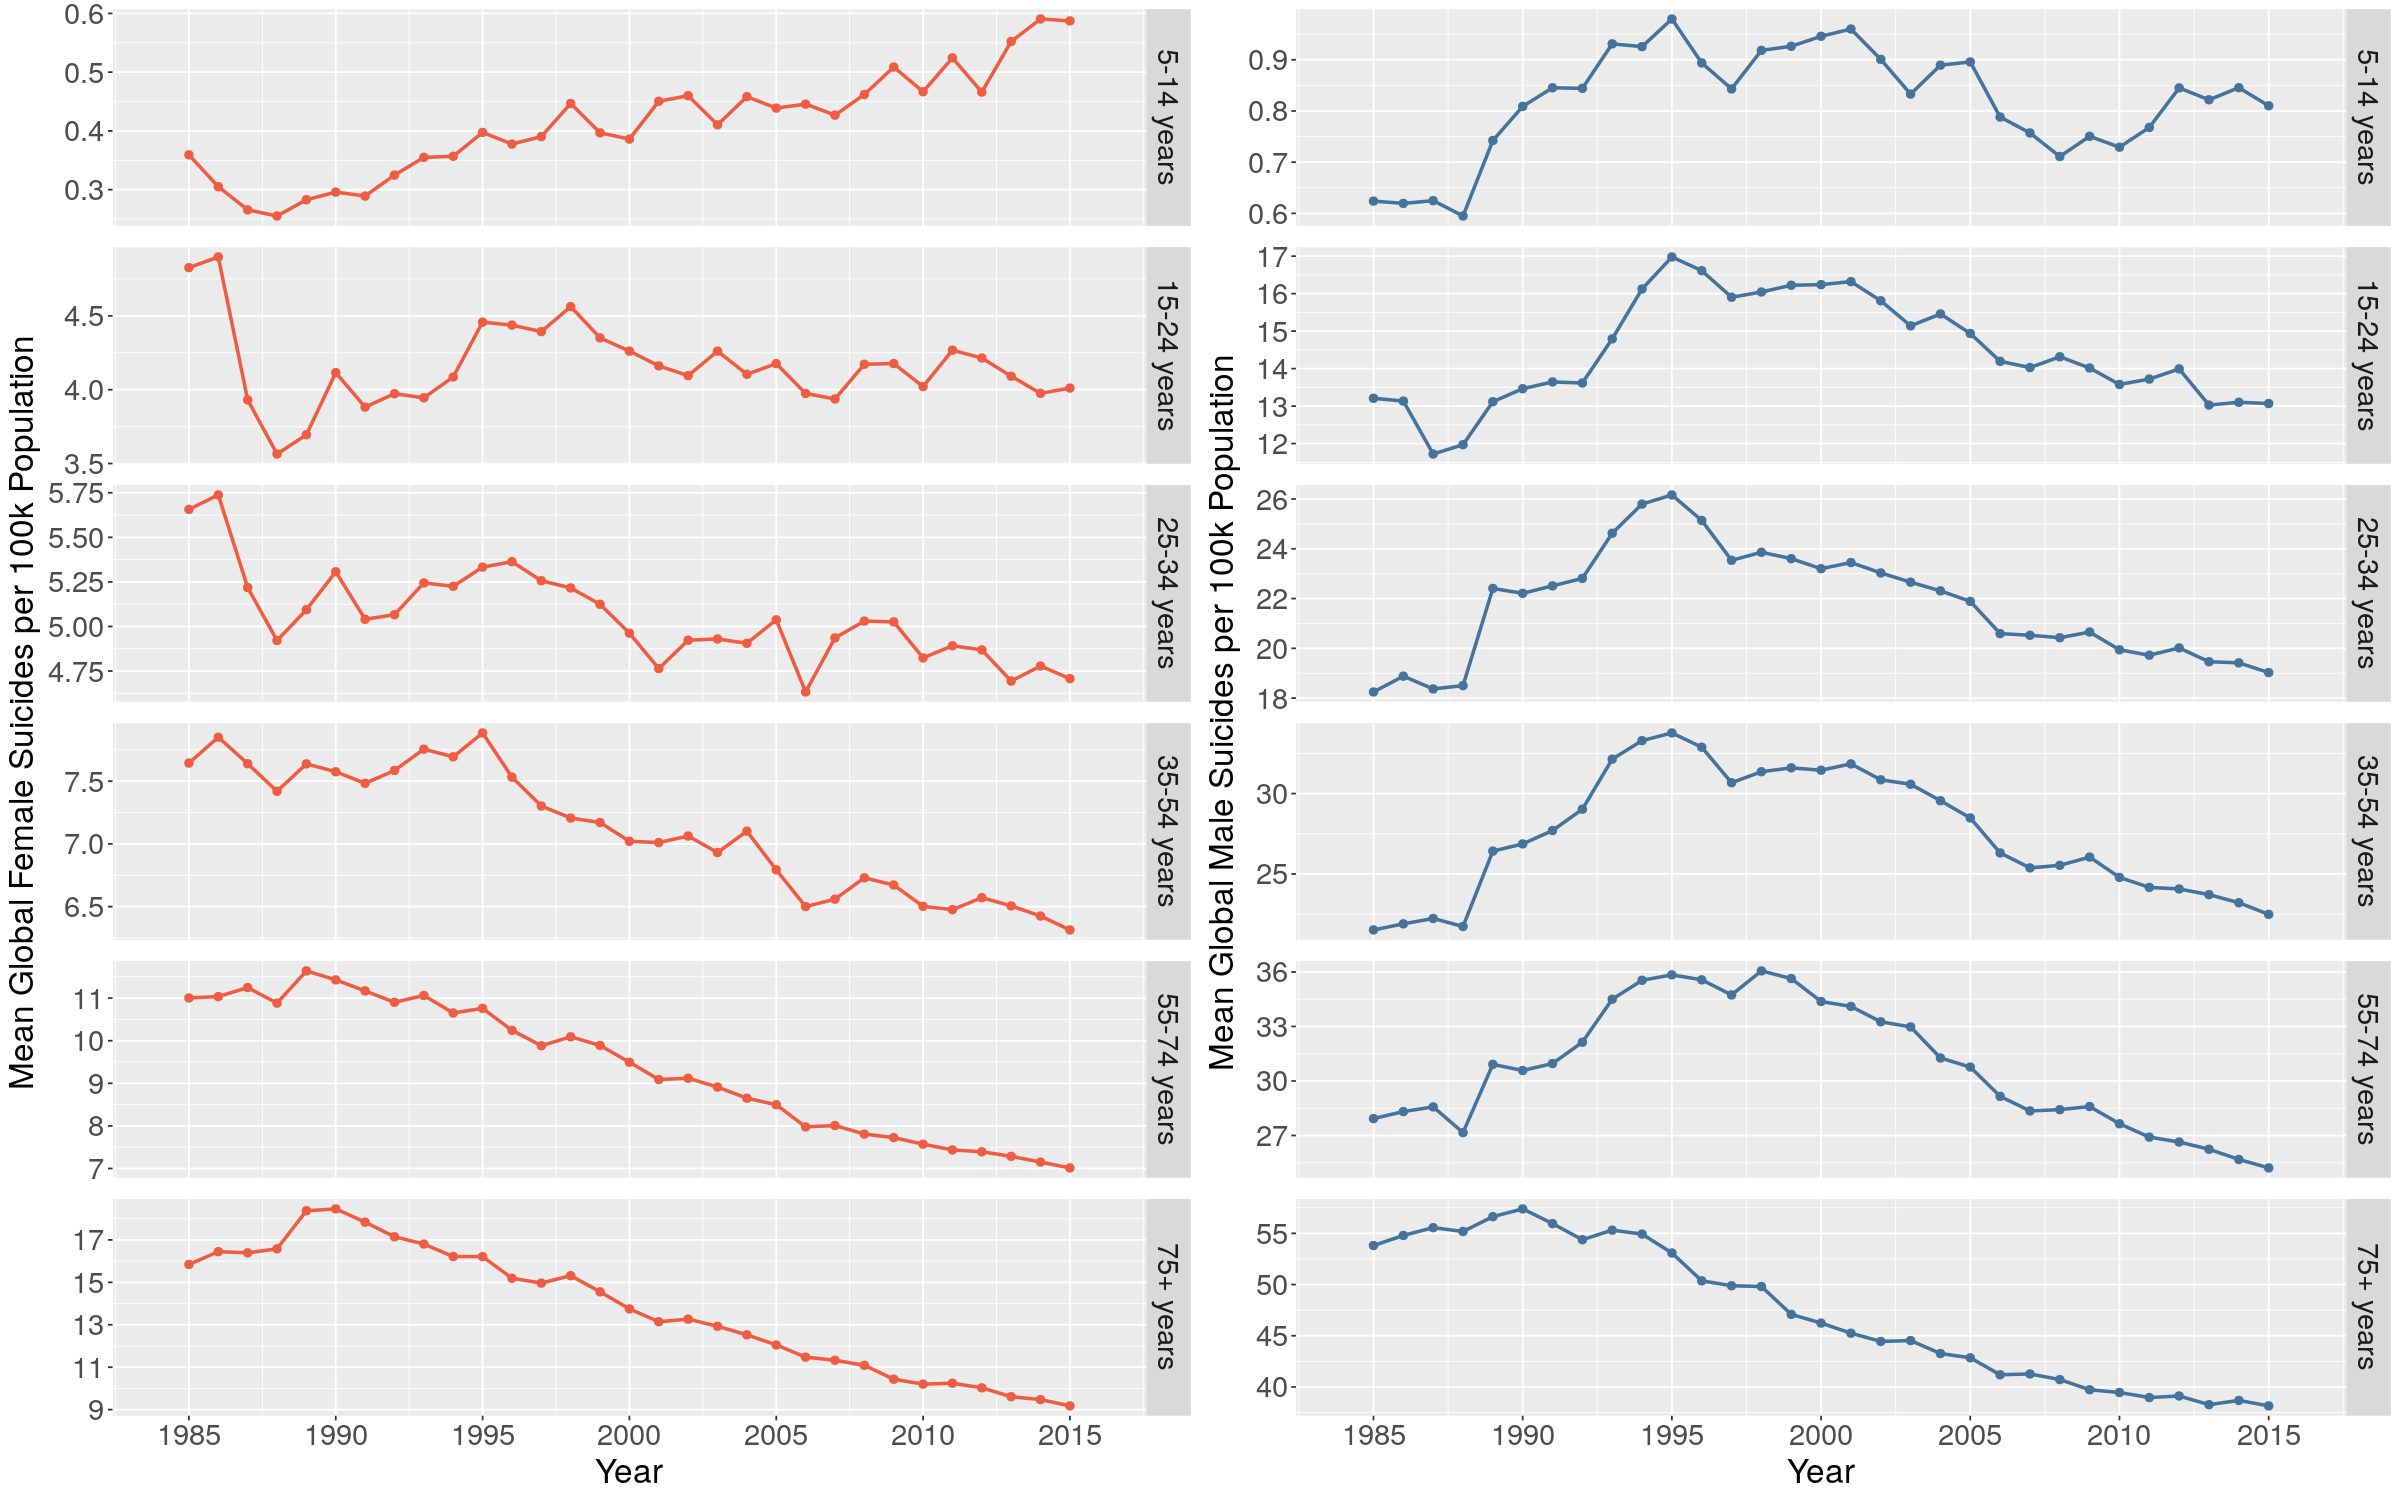

In [11]:
# differences between the sexes in different age groups
suicides_sex_ages = suicide_data %>% # using suicide_data
  group_by(year, sex, age) %>% # group all the data from the same year, 
  # sex and age group
  dplyr::summarise(population = sum(as.numeric(population)), 
            suicides = sum(as.numeric(suicides_no)), 
            suicides_per_100k = (suicides / population) * 100000)
# create rows with the sum of the global population, sum of suicides,
# and the suicides per 100k population, for each sex

# create subsets of female and male data
suicide_female_ages <- suicides_sex_ages[which(suicides_sex_ages$sex == 'female'),]
suicide_male_ages <- suicides_sex_ages[which(suicides_sex_ages$sex == 'male'),]

# female plots
plot_female_ages_theme <- theme(axis.title = element_text(size = 20), 
                                axis.text = element_text(size = 17.5),
                                legend.position = 'none',
                                strip.text.y = element_text(size = 17.5),
                                panel.spacing.y = unit(4.5, "mm"))
plot_female_ages <- ggplot(data = suicide_female_ages, 
                           aes(x = year, y = suicides_per_100k, 
                               col = sex)) +
  facet_grid(age ~ ., scales = 'free_y') +
  # create a grid of two graphs split by sex, with the y axis set to
  # free, in which the scale is automatically calculated
  geom_point(lwd = 2) +
  # add data as points
  geom_line(lwd = 1) +
  # join points together
  xlab('Year') + # change x axis label
  ylab('Mean Global Female Suicides per 100k Population') + 
  # change y axis label
  plot_female_ages_theme + # change the size of axis titles, axis text,
  # remove legend, change the space between graphs vertically 
  scale_x_continuous(breaks = c(seq(1985, 2015, 5)),
                     labels = c(seq(1985, 2015, 5)),
                     limits = c(1984, 2016)) +  
  # change x axis labels
  scale_colour_manual(values = c('tomato2'))
  # change colour of points and lines

# male plots 
plot_male_ages_theme <- theme(axis.title = element_text(size = 20), 
                              axis.text = element_text(size = 17.5),
                              legend.position = 'none',
                              strip.text.y = element_text(size = 17.5),
                              panel.spacing.y = unit(4.5, "mm"))
plot_male_ages <- ggplot(data = suicide_male_ages, 
                         aes(x = year, y = suicides_per_100k, 
                             col = sex)) +
  facet_grid(age ~ ., scales = 'free_y') +
  # create a grid of two graphs split by sex, with the y axis set to
  # free, in which the scale is automatically calculated
  geom_point(lwd = 2) +
  # add data as points
  geom_line(lwd = 1) +
  # join points together
  xlab('Year') + # change x axis label
  ylab('Mean Global Male Suicides per 100k Population') + 
  # change y axis label
  plot_male_ages_theme + # change the size of axis titles, axis text,
  # remove legend, change the space between graphs vertically 
  scale_x_continuous(breaks = c(seq(1985, 2015, 5)),
                     labels = c(seq(1985, 2015, 5)),
                     limits = c(1984, 2016)) +
  # change x labels
  scale_colour_manual(values = c('#44749D'))
  # change colour of points and lines

options(repr.plot.width = 20, repr.plot.height = 12.5)
# arrange both sex plots into one graph
grid.arrange(plot_female_ages, plot_male_ages, ncol = 2)

Interpretation:
* Within each sex, the mean global suicide rate **increases with age**, but the rate is **generally decreasing** within an age group,
* However, the rate within the 5-14 group is **increasing for both sexes** and has **doubled** within females, though the rate is the lowest across any age group,
* Between the sexes, the suicide rate trend for an age group look quite similar across the board,
* For any age group, the suicide rate is **higher in males**.

Further statistical analysis can confirm if the number of suicides in each group is significantly different from other groups, both within and between the sexes.

# 3. Statistical Analysis
I will now perform some statistical analysis to address the difference in suicide rate between the sexes for a variety of variables.

## 3.1 Global suicide rate differences 
In **section 2.2.1**, the lefthand graph shows a disparity between global female and male suicides. A test can be used to compare differences between two independent groups, in this case females and males. 

An **unpaired two-sample t-test** can be used to compare the **means** of two independent groups. This test is based on two assumptions, in addition to the independence of the groups. 

The first assumption is that the data from each group follows a **normal distribution** and a **Shapiro-Wilk test** can determine this:

In [12]:
# first, check normality assumptions:
with(suicides_sex, shapiro.test(suicides[sex == 'female']))
with(suicides_sex, shapiro.test(suicides[sex == 'male'])) 


	Shapiro-Wilk normality test

data:  suicides[sex == "female"]
W = 0.70982, p-value = 0.000001628



	Shapiro-Wilk normality test

data:  suicides[sex == "male"]
W = 0.78623, p-value = 0.000029


The two p-values are **less** than 0.05, therefore the null hypothesis (*that the data are normally distributed*) is rejected. Therefore, the *distribution* of the female and male data are **significantly different** from the normal distribution, failing this assumption.

The second assumption is that the variance is the same between the two groups. This can be tested for using an **F-test**:

In [13]:
# second, check variance assumptions:
var.test(suicides ~ sex, data = suicides_sex)


	F test to compare two variances

data:  suicides by sex
F = 0.038941, num df = 30, denom df = 30, p-value = 0.00000000000003808
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.01877637 0.08076173
sample estimates:
ratio of variances 
        0.03894114 


The p-value is **less** than 0.05, therefore, the *variance* of the female and male data are **significantly different** from each other, failing this assumption too.

Due to failing both assumptions, the unpaired two-sample t-test cannot be used, but the non-parametric version, the **unpaired two-samples Wilcoxon test**, can be used instead. Whereas parametric version tests the difference in *means*, the non-parametric version tests the difference in *medians*.

In [14]:
# so the non-parametric test must be used:
wilcox_sex_diff = wilcox.test(suicides ~ sex, data = suicides_sex)
wilcox_sex_diff$p.value

[1] 0.000000000000000004297117

The p-value is **less** than 0.05, therefore the *median* number of global suicides for females is **significantly different** than the *median* number of global suicides for males. This confirms the insights gleaned from the graph in section 2.2.1.

## 3.2 Age 
In **section 2.2.2**, I identified that the suicide rate differed across age groups within and between each sex. 

In **section 3.2.1**, I will assess if the suicide rate is significantly different in each age group within **females**, and I will do the same for **males** in **section 3.2.2**. The suicide rate for a specific age group will then be tested **between each sex** in **section 3.2.3**, to determine if there is a significant difference between the sexes.

### 3.2.1 Female age differences
The question here is: are the number of suicides in each age group significantly different from each other in females? A **one-way analysis of variance **(ANOVA) can be used to test this:

In [15]:
aov_females_age = aov(suicides ~ age, data = suicide_female_ages)

Like the unpaired two-sample t-test mentioned in **section 3.1**, a one-way ANOVA is a parametric test that tests differences in means and it also has its own assumptions.

Similarly to the unpaired two-sample t-test, the first assumption is about distribution. However, in a one-way ANOVA, the assumption is that the **residuals** follow a normal distribution, which a **Shapiro-Wilk test** can determine:


In [16]:
# extract residuals
aov_females_age_residuals = residuals(object = aov_females_age)
# perfrom Shapiro-Wilk test
shapiro.test(aov_females_age_residuals)


	Shapiro-Wilk normality test

data:  aov_females_age_residuals
W = 0.79214, p-value = 0.000000000000005455


The p-value is **less** than 0.05, therefore the *distribution* of the *residuals* is **significantly different** from a normal distribution, violating this assumption.

**Levene's test** can be used to test if their is a statistically significant difference in **variance** between the age groups, with the requisite being that there should be no difference:

In [17]:
# perform Levene's test
leveneTest(suicides ~ age, data = suicide_female_ages)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,5,7.286466,0.000003064414
,180,NA,NA


From the output above we can see that the p-value is again **less** than the significance level of 0.05. So, the *variance* across age groups is **statistically significantly different**. Therefore, this assumption is violated too.

Fortunately there is also a non-parametric equivalent to a one-way ANOVA - the **Kruskal-Wallis test**:

In [18]:
# use the non-parametric Kruskal-Wallis test:
kw_females_age = kruskal.test(suicides ~ age, data = suicide_female_ages)
# extract p-value
kw_females_age$p.value

[1] 0.0000000000000000000000000000000004308701

The p-value is **less** than 0.05 and I can therefore conclude that there is a **significant difference** in the *median* female suicide rate for each age group.

The obvious follow-up question is to ask specifically which pairs of age groups are significantly different. For this, the function **pairwise.wilcox.test()** can be used, which takes a data point (*number of global female suicides for one year*) from two age groups to test if they are significantly different, for all possible pairs.

In [19]:
# perform pairwise comparisons using Wilcoxon rank sum test
pw_females_age = pairwise.wilcox.test(suicide_female_ages$suicides,
                                      suicide_female_ages$age,
                                      p.adjust.method = 'BH')
pw_females_age

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test 

data:  suicide_female_ages$suicides and suicide_female_ages$age 

            5-14 years     15-24 years          25-34 years         
15-24 years 0.000000000019 -                    -                   
25-34 years 0.000000000019 0.000000261586       -                   
35-54 years 0.000000000019 < 0.0000000000000002 < 0.0000000000000002
55-74 years 0.000000000019 < 0.0000000000000002 < 0.0000000000000002
75+ years   0.000000000019 0.000000027512       0.00059             
            35-54 years          55-74 years         
15-24 years -                    -                   
25-34 years -                    -                   
35-54 years -                    -                   
55-74 years 0.000002906720       -                   
75+ years   < 0.0000000000000002 < 0.0000000000000002

P value adjustment method: BH 

Each pairwise-comparison has a p-value of **less** than 0.05, I can therefore conclude that for females, there is a **statistically significant difference** in the number of suicides *between* the age groups. This confirms the observation in **section 2.2.2** that the suicide rate increases with age for females.

### 3.2.2 Male age differences
The analysis in the previous section will now be repeated for males:

In [20]:
aov_males_age = aov(suicides ~ age, data = suicide_male_ages)
# extract residuals
aov_males_age_residuals = residuals(object = aov_males_age)
# test for normality of residuals
shapiro.test(aov_males_age_residuals)
# test for homogeneity of variance
leveneTest(suicides ~ age, data = suicide_male_ages)


	Shapiro-Wilk normality test

data:  aov_males_age_residuals
W = 0.80725, p-value = 0.00000000000002091


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,5,11.31325,0.000000001682514
,180,NA,NA


Both p-values are **less** than 0.05, so the assumptions are violated and the **Kruskal-Wallis test** is used instead:

In [21]:
# perform Kruskal-Wallis test
kw_males_age = kruskal.test(suicides ~ age, data = suicide_male_ages)
# extract p-value
kw_males_age$p.value

[1] 0.000000000000000000000000000000002525514

The p-value is **less** than 0.05 and I can therefore conclude that there is a **significant difference** in the *median* male suicide rate between each age group.

I will now use the multiple pairwise comparison:

In [22]:
# perform pairwise comparisons using Wilcoxon rank sum test
pw_males_age = pairwise.wilcox.test(suicide_male_ages$suicides,
                                    suicide_male_ages$age,
                                    p.adjust.method = 'BH')
pw_males_age

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test 

data:  suicide_male_ages$suicides and suicide_male_ages$age 

            5-14 years        15-24 years       25-34 years      
15-24 years 0.000000000023350 -                 -                
25-34 years 0.000000000023350 0.000000174585920 -                
35-54 years 0.000000000023350 0.000000000023350 0.000000003324901
55-74 years 0.000000000023350 0.000000007621820 0.000001269152346
75+ years   0.000000000023350 0.000000174585920 0.000000000000026
            35-54 years          55-74 years         
15-24 years -                    -                   
25-34 years -                    -                   
35-54 years -                    -                   
55-74 years 0.000000117810885    -                   
75+ years   < 0.0000000000000002 < 0.0000000000000002

P value adjustment method: BH 

Once again, each pairwise-comparison has a p-value of **less** than 0.05, I can therefore conclude that there is a **statistically significant difference** in the number of suicides between the age groups for males. This confirms the observation in **section 2.2.2** that the suicide rate increases with age for males.

### 3.2.3 Between-sex age differences
Having now established that there is a difference in the number of suicides between each group in each sex, I will now test if there is a difference between each sex.

First I am going to test that both sex and age are significant predictors of the number of suicides:

In [23]:
aov_sex_age = aov(suicides ~ sex + age, data = suicides_sex_ages)
summary(aov_sex_age)

             Df      Sum Sq     Mean Sq F value              Pr(>F)    
sex           1 35111894741 35111894741   396.3 <0.0000000000000002 ***
age           5 56318903783 11263780757   127.1 <0.0000000000000002 ***
Residuals   365 32340426817    88603909                                
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Both sex and age are **statistically significant** (*p-values less than 0.05*), with sex being more significant (*higher F value*).

Next I will test if the interaction between sex and age is significant, by changing the '+' sign in the formula to a '*':

In [24]:
aov_sex_age_interaction = aov(suicides ~ sex * age, data = suicides_sex_ages)
summary(aov_sex_age_interaction)

             Df      Sum Sq     Mean Sq F value              Pr(>F)    
sex           1 35111894741 35111894741  1047.0 <0.0000000000000002 ***
age           5 56318903783 11263780757   335.9 <0.0000000000000002 ***
sex:age       5 20268004466  4053600893   120.9 <0.0000000000000002 ***
Residuals   360 12072422351    33534507                                
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

So the interaction term is also significant, and it will therefore be included from now on.

As there are now two predictors (*sex and age*), each with different levels, a **two-way ANOVA** can be used, but its assumptions must be tested first:

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,11,14.97258,0.000000000000000000000005883149
,360,NA,NA



	Shapiro-Wilk normality test

data:  aov_sex_age_interaction_residuals
W = 0.69522, p-value < 0.00000000000000022


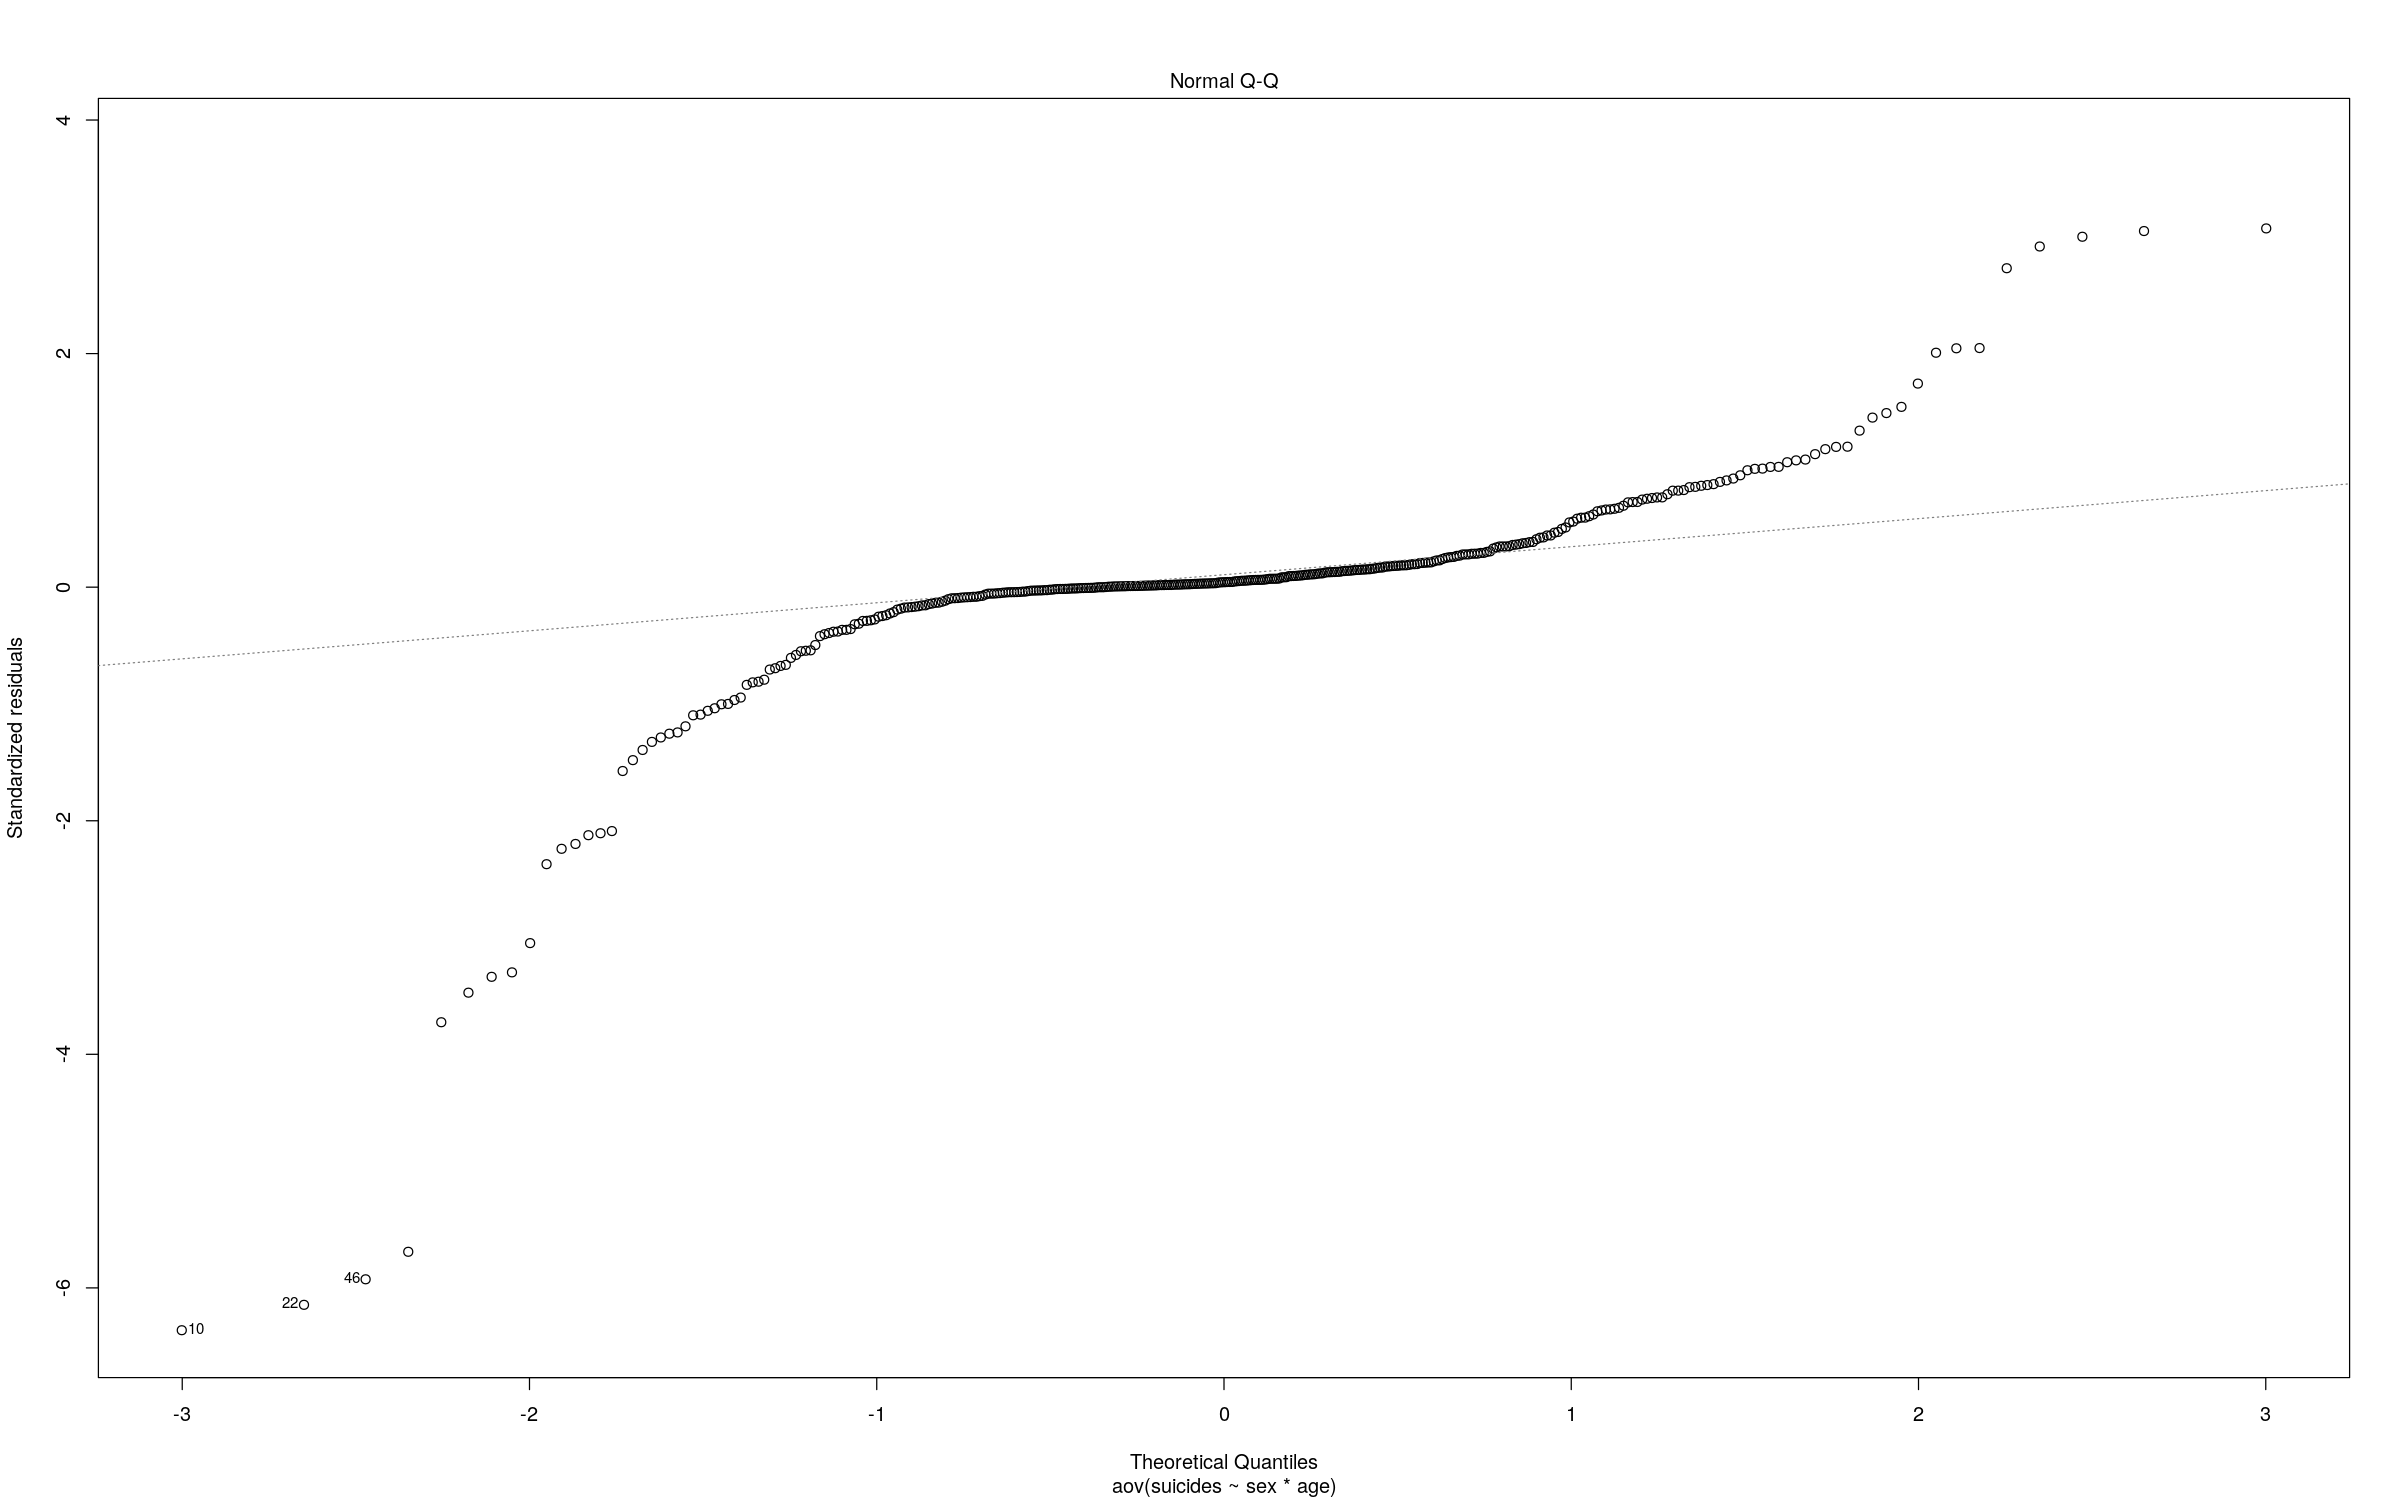

In [25]:
# test for homogeneity of variance
leveneTest(suicides ~ sex * age, data = suicides_sex_ages)
# extract residuals
aov_sex_age_interaction_residuals = residuals(object = aov_sex_age_interaction)
# test for normality of residuals
shapiro.test(aov_sex_age_interaction_residuals)
# plot the quantiles of the residuals against the quantiles of a normal distribution
plot(aov_sex_age_interaction, 2)

The assumptions have not been met and there isn't a non-parametric alternative to a two-way ANOVA that I am aware of. So, I am going to remove the outliers identified by the plot, namely points 10, 22 and 46, and re-run the assumption tests:

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,11,13.16381,0.000000000000000000004446156
,357,NA,NA



	Shapiro-Wilk normality test

data:  aov_sex_age_interaction_outliers_residuals
W = 0.74264, p-value < 0.00000000000000022


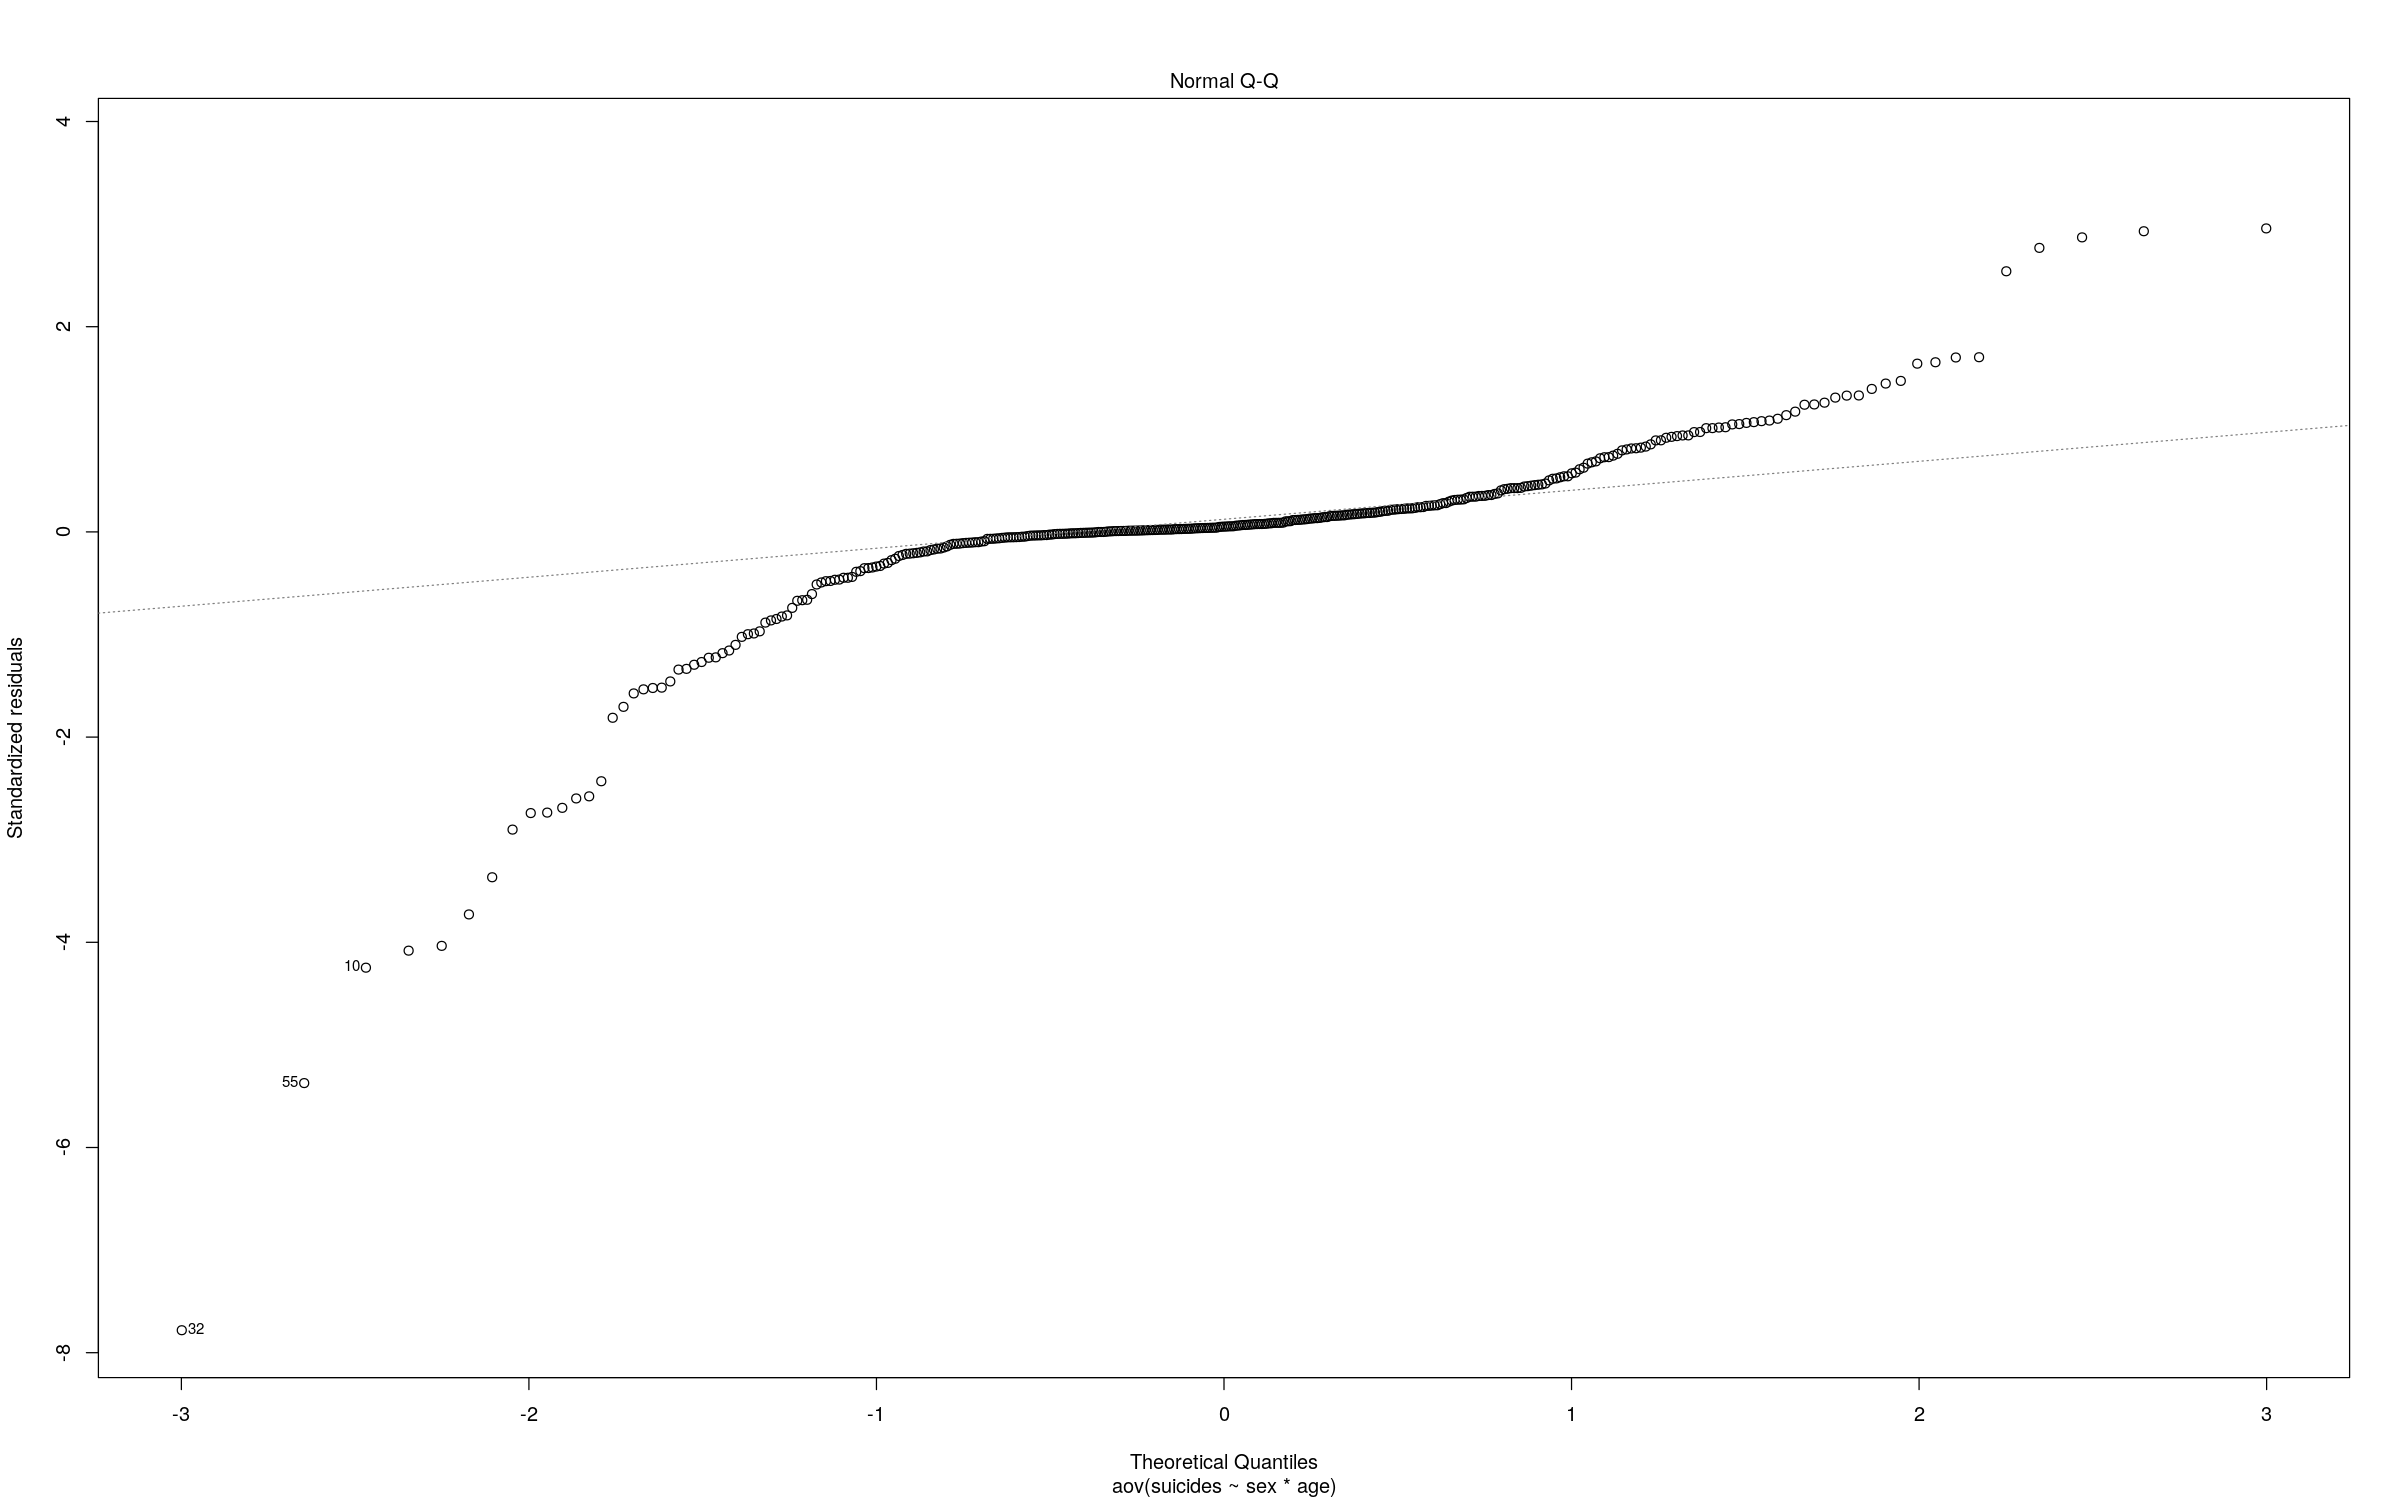

In [26]:
# create subset with outliers removed
suicides_sex_ages_outliers = suicides_sex_ages[-c(10, 22, 46),]
# perform two-way ANOVA
aov_sex_age_interaction_outliers = aov(suicides ~ sex * age,
                                       data = suicides_sex_ages_outliers)
# test for homogeneity of variance
leveneTest(suicides ~ sex * age, data = suicides_sex_ages_outliers)
# extract residuals
aov_sex_age_interaction_outliers_residuals = 
  residuals(object = aov_sex_age_interaction_outliers)
# test for normality of residuals
shapiro.test(aov_sex_age_interaction_outliers_residuals)
# plot the quantiles of the residuals against the quantiles of a normal distribution 
plot(aov_sex_age_interaction_outliers, 2)

The assumptions are not met again, so this should be taken into account when talking about the conclusions from this analysis. However, the assumption tests are quite sensitive to small deviances in variance or distribution when large sample sizes are used.

Out of interest, I will perform a **multiple-pairwise comparison** using **TukeyHSD()** to assess if there is a difference between age groups.

(*"which = 'age'" is used because sex has two levels, which have already been seen to be statistically significant in the two-way ANOVA, though remember it failed the assumptions*).

In [27]:
# perform multiple-pairwise comparison test 
TukeyHSD(aov_sex_age_interaction_outliers, which = 'age')

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = suicides ~ sex * age, data = suicides_sex_ages_outliers)

$age
                              diff        lwr         upr     p adj
15-24 years-5-14 years   12136.274   9700.232  14572.3168 0.0000000
25-34 years-5-14 years   17209.968  14773.925  19646.0103 0.0000000
35-54 years-5-14 years   39651.595  37184.780  42118.4099 0.0000000
55-74 years-5-14 years   25803.242  23367.199  28239.2845 0.0000000
75+ years-5-14 years      9656.629   7220.586  12092.6716 0.0000000
25-34 years-15-24 years   5073.694   2637.651   7509.7361 0.0000001
35-54 years-15-24 years  27515.321  25048.506  29982.1357 0.0000000
55-74 years-15-24 years  13666.968  11230.925  16103.0103 0.0000000
75+ years-15-24 years    -2479.645  -4915.688    -43.6026 0.0433194
35-54 years-25-34 years  22441.627  19974.812  24908.4422 0.0000000
55-74 years-25-34 years   8593.274   6157.232  11029.3168 0.0000000
75+ years-25-34 years    -

All p-values are **less** than 0.05, though '75+ years-15-24 years' comes close to being insignificant. I will tentatively conclude that there is a significant difference in the suicide rate between age groups between the sexes.

## 3.3 Population
I am also interested to see if the size of the population is a predictor of the number of suicides. For this analysis, both the number of suicides and the population size will be **log transformed**.

In **section 3.3.1**, I will assess if the **female suicide rate** is significantly affected by the size of the **female population**, and I will do the same for **males** in **section 3.3.2**. The suicide rate **between each sex** will be tested in **section 3.3.3**, after controlling for population.

In [28]:
sex_population = suicide_data %>% # using suicide_data
  group_by(country, sex) %>% # group all the data from the same country
  # and sex
  dplyr::summarise(suicides = mean(sum(as.numeric(suicides_no))),
            population = mean(population))
# create rows with the mean of the number of suicides and the mean of
# the population, for each sex in each country across the time period

# change some country labels
sex_population <- transform(sex_population, 
                            country = revalue(country, c("Russian Federation" = "Russia")))
sex_population <- transform(sex_population, 
                            country = revalue(country, c("United States" = "USA")))
sex_population <- transform(sex_population,
                            country = revalue(country, c('Republic of Korea' = 'South Korea'))) 

ERROR: Error in revalue(country, c(`Russian Federation` = "Russia")): could not find function "revalue"


### 3.3.1 Female population differences
I want to test if the female suicide rate changes as the female population changes.

In [29]:
# create a subset of sex_population with female data
female_population <- sex_population[which(sex_population$sex == 'female'),]
# change country to a character
female_population$country <- as.character(female_population$country)
# perform linear regression
female_pop_lm = lm(log(suicides) ~ log(population), 
                   data = female_population)
summary(female_pop_lm)


Call:
lm(formula = log(suicides) ~ log(population), data = female_population)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4858 -0.4788  0.1229  0.7838  1.7736 

Coefficients:
                Estimate Std. Error t value            Pr(>|t|)    
(Intercept)     -8.50616    0.73133  -11.63 <0.0000000000000002 ***
log(population)  1.25147    0.05627   22.24 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.063 on 88 degrees of freedom
Multiple R-squared:  0.8489,	Adjusted R-squared:  0.8472 
F-statistic: 494.6 on 1 and 88 DF,  p-value: < 0.00000000000000022


Population is highly **significant** with a p-value **less** than 0.05. This means that there is a **1.25% increase** in the *mean* number of female suicides for every **1% increase** in the female population between countries.
An R-squared of 0.85 means that population can explain **85%** of the variation in suicide rate.

This is visualised below:

`geom_smooth()` using formula 'y ~ x'



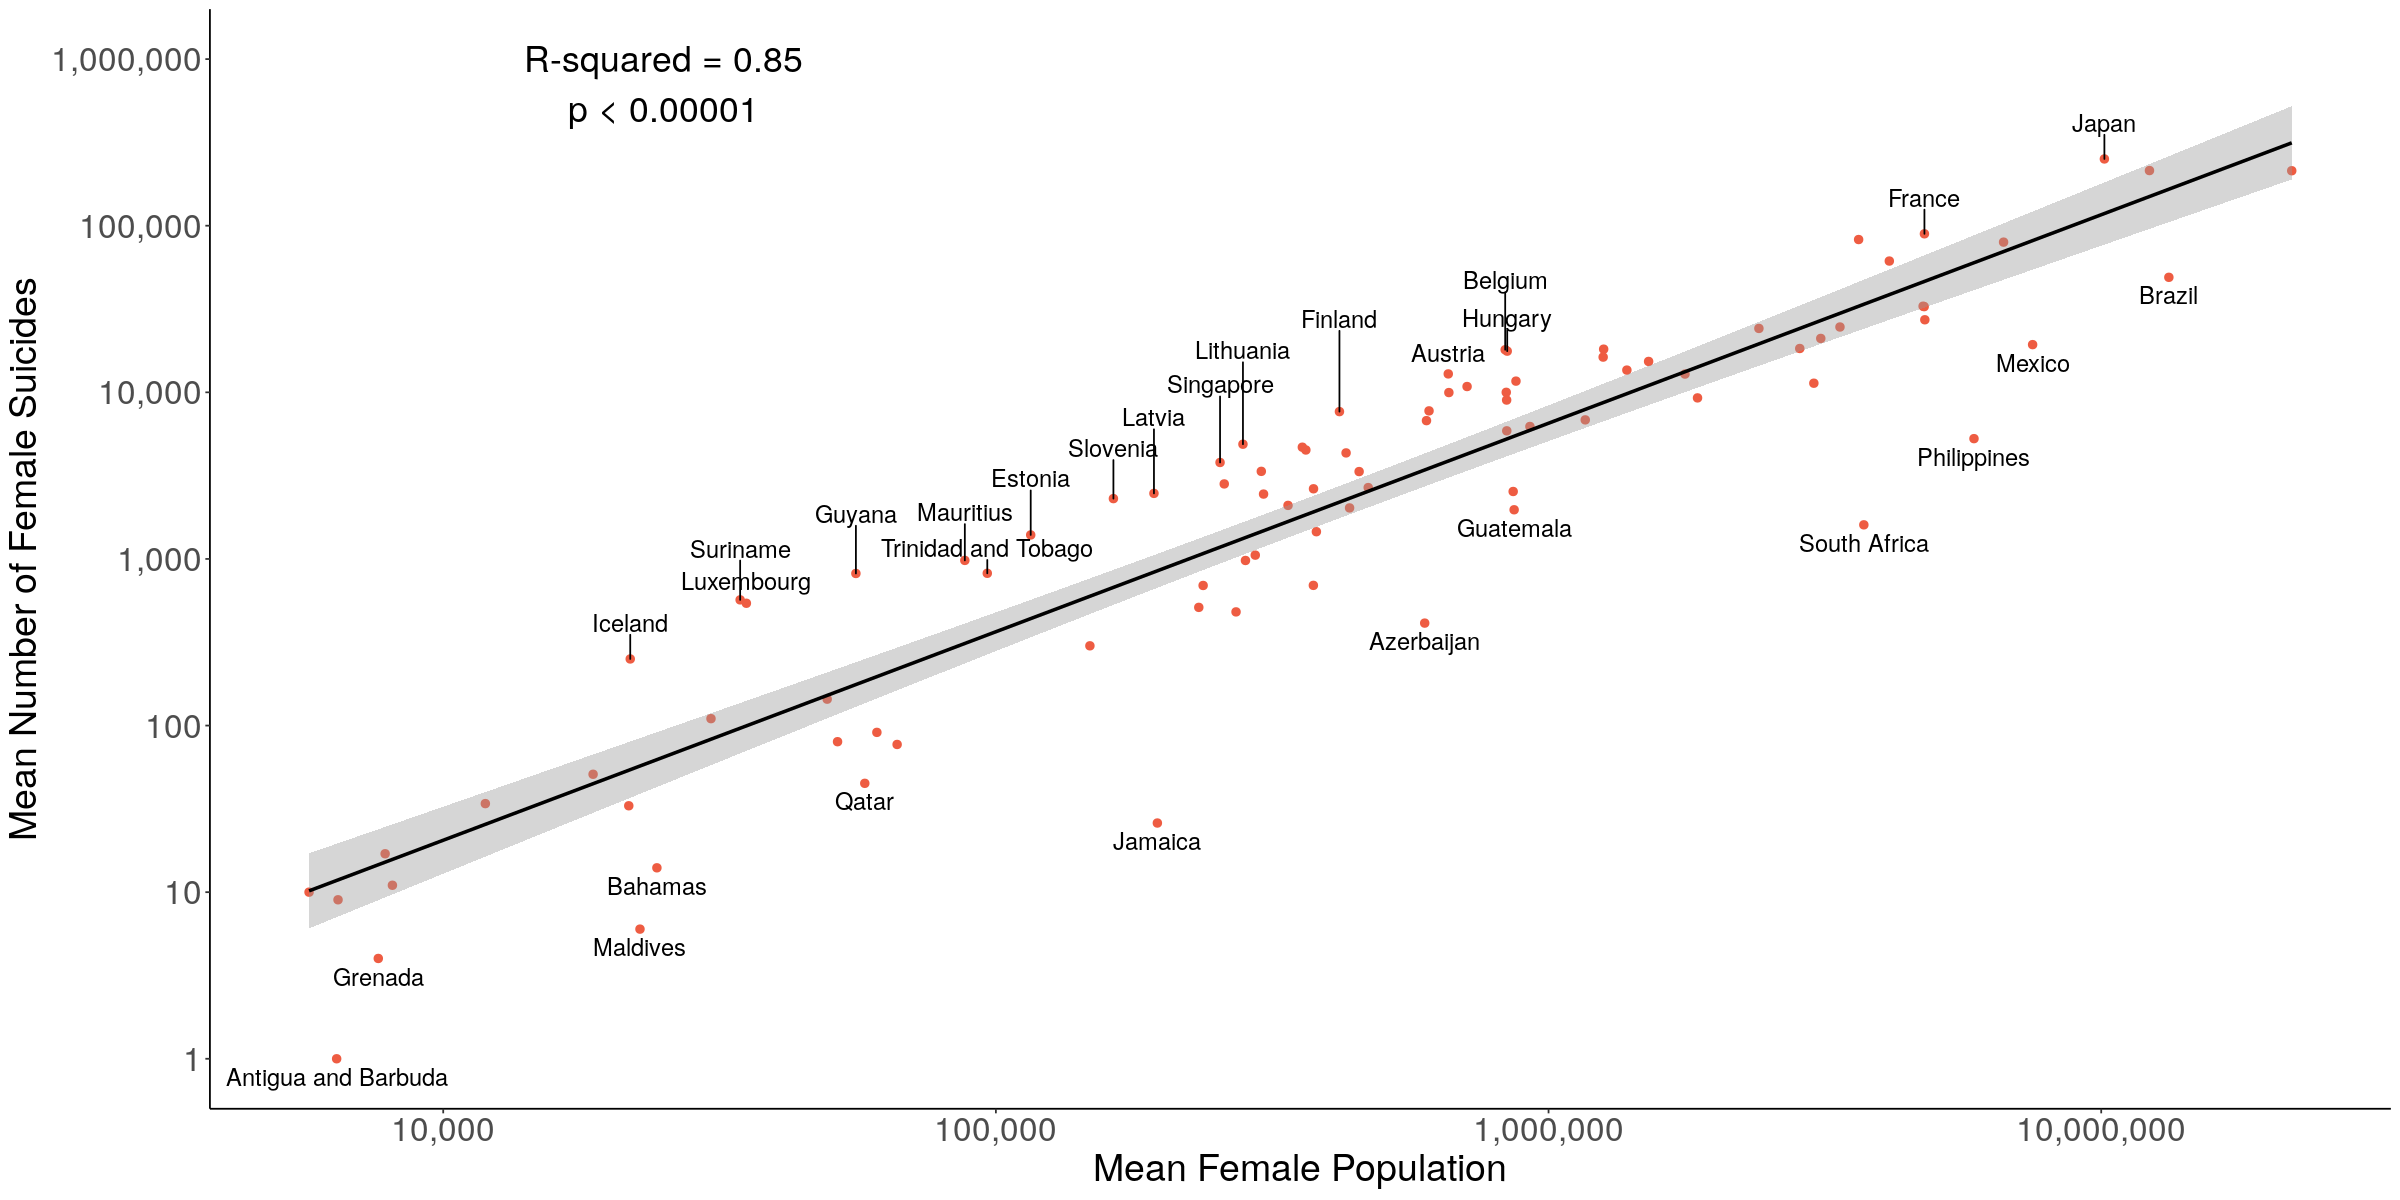

In [30]:
plot_female_population_theme <- theme(axis.title = element_text(size = 22.5), 
                                      axis.text = element_text(size = 20))

# create a vector with the countries below the regression line
# to label on the plot
highlighted_countries_below_f = c('Antigua and Barbuda', 'Grenada',  
                                'Jamaica', 'USA', 'Brazil',
                                'Azerbaijan', 'Maldives', 'Mexico',
                                'South Africa', 'Philippines', 
                                'Guatemala', 'Bahamas', 'Qatar')
# and above the line
highlighted_countries_above_f = c('Iceland', 'Japan', 'Russia',
                                'Luxembourg', 'Suriname', 'Estonia',
                                'Mauritius', 'Guyana', 'Slovenia',
                                'Trinidad and Tobago', 'Latvia',
                                'Lithuania', 'Singapore', 'Finland',
                                'Belgium', 'Hungary', 'Austria',
                                'South Korea', 'France')

plot_female_population <- ggplot(data = female_population, 
                          aes(x = population, y = suicides,
                             label = country)) +
  geom_point(lwd = 2, col = 'tomato2') +
  # add data as points
  geom_smooth(method = 'lm', col = 'black') + 
  # add regression line
  theme_classic() + # white background, no gridlines
  xlab('Mean Female Population') + # change x axis label
  ylab('Mean Number of Female Suicides') + # change y axis label
  plot_female_population_theme + # change the size of axis titles and axis text
  annotate('text', x = 25000, y = 1000000, label = 'R-squared = 0.85', size = 7.5) +
  annotate('text', x = 25000, y = 500000, label = 'p < 0.00001', size = 7.5) +
  # add text denoting the R-squared and p-value
  scale_x_continuous(trans = 'log',
                     breaks = c(10000, 100000, 1000000, 10000000),
                     labels = c('10,000', '100,000', '1,000,000', '10,000,000')) +
  scale_y_continuous(trans = 'log', 
                     breaks = c(1, 10, 100, 1000, 10000, 100000, 1000000),
                     labels = c('1', '10', '100', '1,000', '10,000', '100,000',
                                '1,000,000'),
                     limits = c(1, 1000000)) +
  # log transform both axes, but use labels to show the actual values 
  # increasing by a power of 10
  geom_text_repel(data = female_population[which(female_population$country %in% 
                                                 highlighted_countries_below_f),],
                  direction = 'y',
                  nudge_y = -0.25,
                  size = 5) +
  geom_text_repel(data = female_population[which(female_population$country %in% 
                                                 highlighted_countries_above_f),],
                  direction = 'y',
                  nudge_y = 0.5,
                  #force = 5,
                  size = 5)
  # add country labels

options(repr.plot.width = 20, repr.plot.height = 10)
plot_female_population

Interpretation:
* Any country **above** the regression line has a relatively **higher** increase in suicides than would be predicted by their population, and vice versa,
* It struck me that many **island** countries have relatively higher/lower suicide rates than would be predicted by their population,
* Also, eight of the 12 labelled countries below the regression line are in the southern hemisphere, and 17 of the 18 countries above the regression line are in the northern hemisphere - perhaps there is a link between suicide rate and which hemisphere a country is in, or its distance from the equator?

### 3.3.2 Male population differences
I'll now repeat the previous analysis for males:

In [31]:
# create a subset of sex_population with male data
male_population <- sex_population[which(sex_population$sex == 'male'),]
# change country to a character
male_population$country <- as.character(male_population$country)
# perform linear regression
male_pop_lm = lm(log(suicides) ~ log(population), 
                   data = male_population)
summary(male_pop_lm)


Call:
lm(formula = log(suicides) ~ log(population), data = male_population)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0542 -0.6047  0.2994  0.6589  1.6761 

Coefficients:
                Estimate Std. Error t value             Pr(>|t|)    
(Intercept)      -6.2877     0.7240  -8.685    0.000000000000183 ***
log(population)   1.1802     0.0558  21.149 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.043 on 88 degrees of freedom
Multiple R-squared:  0.8356,	Adjusted R-squared:  0.8337 
F-statistic: 447.3 on 1 and 88 DF,  p-value: < 0.00000000000000022


Population is again highly **significant** with a p-value **less** than 0.05. This means that there is a **1.18% increase** in the *mean* number of male suicides for every **1% increase** in the male population between countries, slightly less than the females.
An R-squared of 0.83 means that population can explain **83%** of the variation in suicide rate.

`geom_smooth()` using formula 'y ~ x'



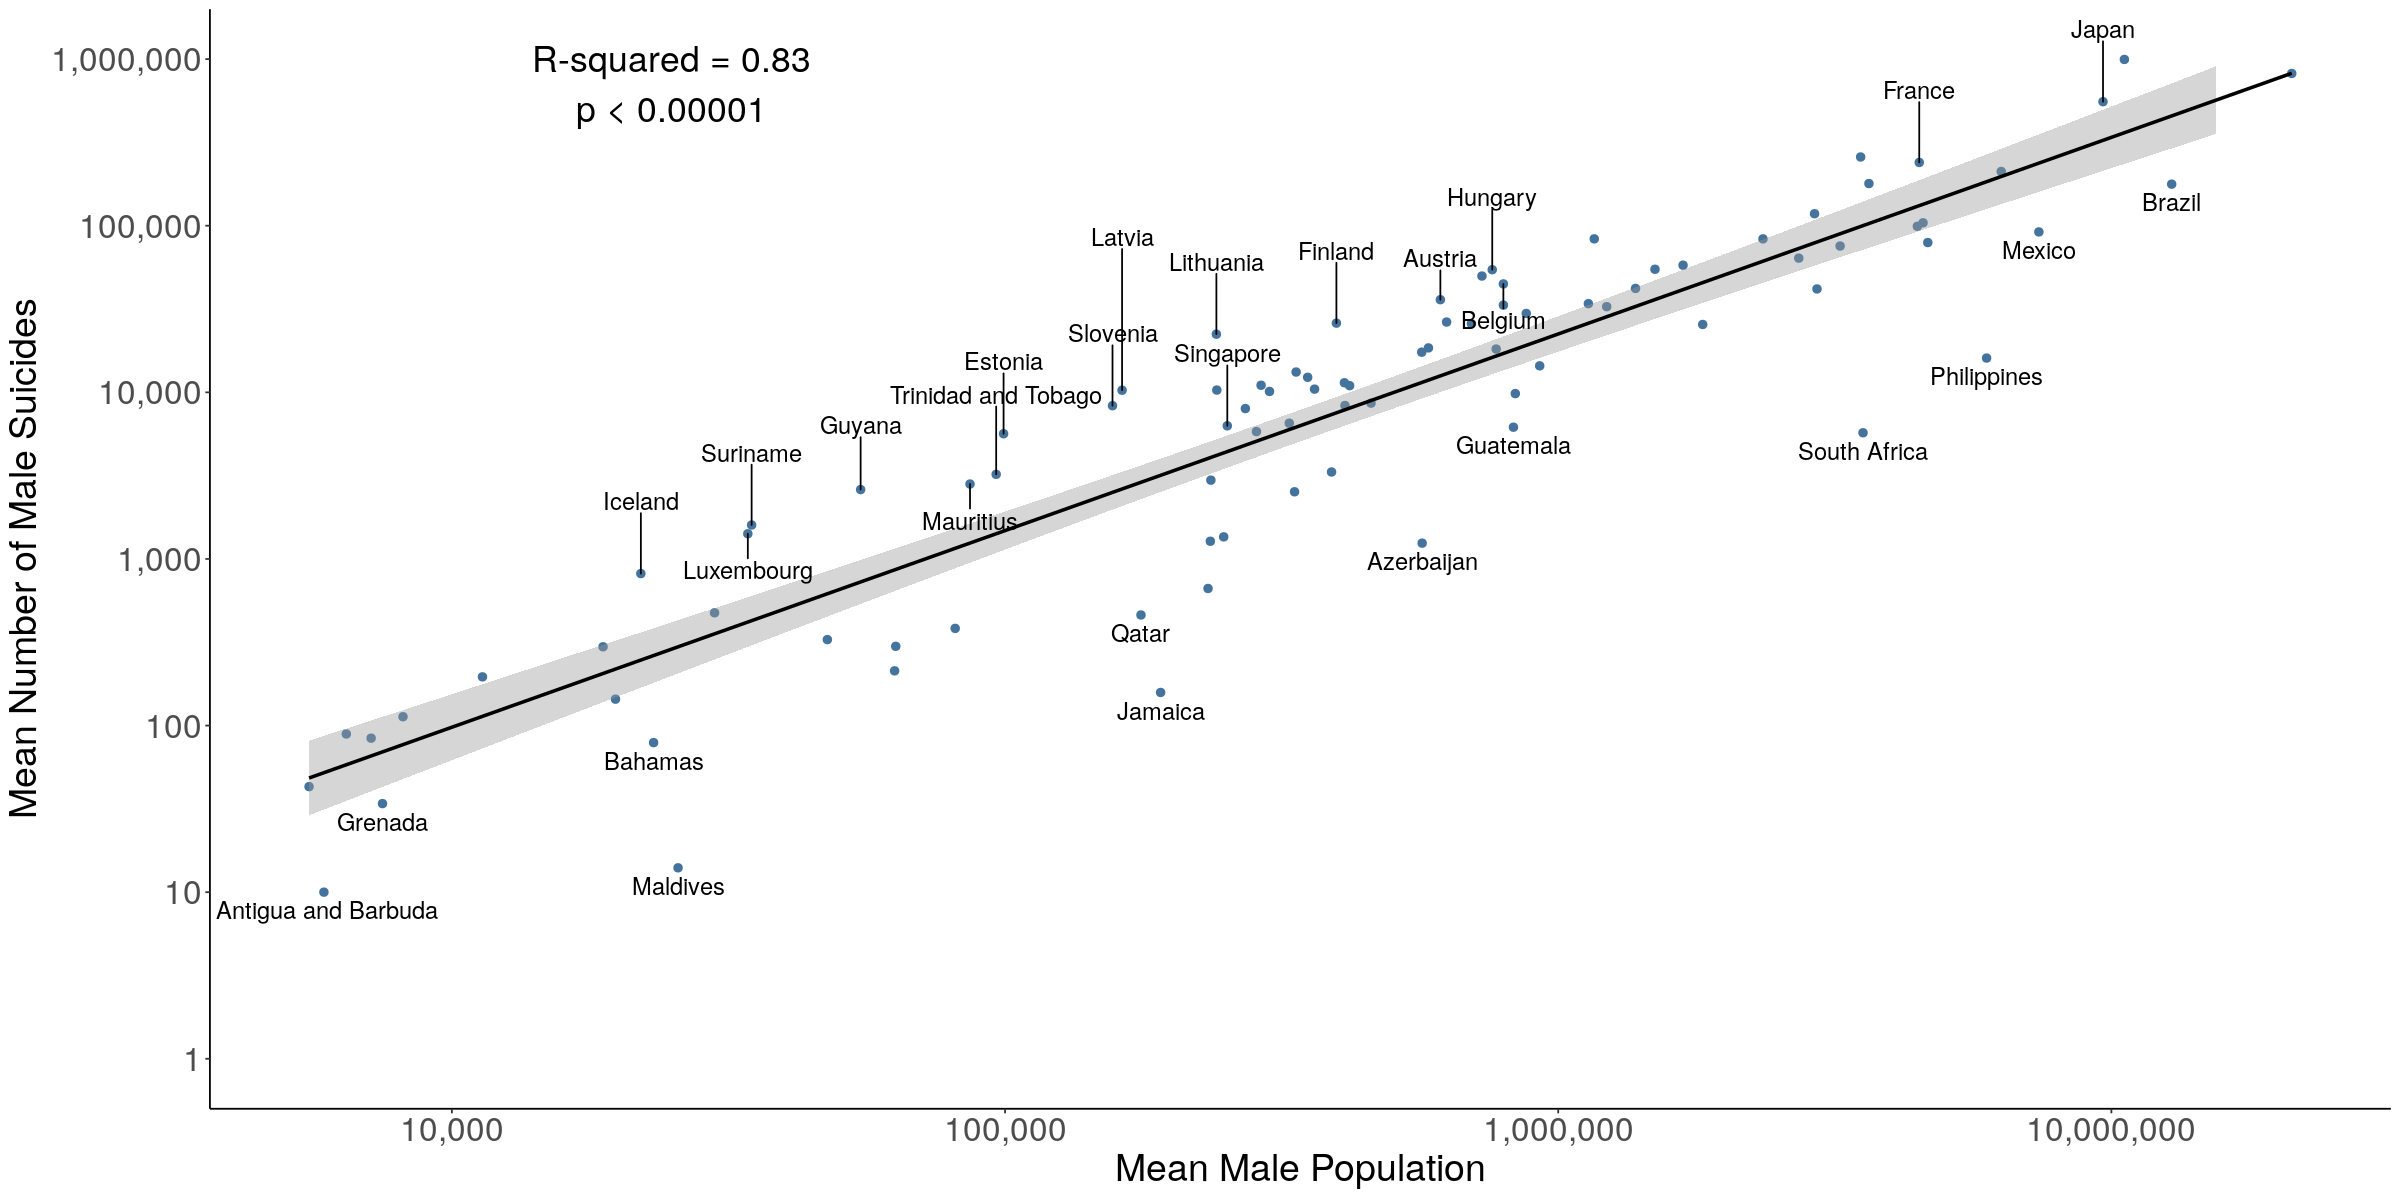

In [32]:
plot_male_population_theme <- theme(axis.title = element_text(size = 22.5), 
                                    axis.text = element_text(size = 20))

# create a vector with the countries below the regression line
# to label on the plot
highlighted_countries_below_m = c('Antigua and Barbuda', 'Grenada',  
                                  'Jamaica', 'USA', 'Brazil',
                                  'Azerbaijan', 'Maldives', 'Mexico',
                                  'South Africa', 'Philippines', 
                                  'Guatemala', 'Bahamas', 'Qatar')
# and above the line
highlighted_countries_above_m = c('Iceland', 'Japan', 'Russia',
                                  'Luxembourg', 'Suriname', 'Estonia',
                                  'Mauritius', 'Guyana', 'Slovenia',
                                  'Trinidad and Tobago', 'Latvia',
                                  'Lithuania', 'Singapore', 'Finland',
                                  'Belgium', 'Hungary', 'Austria',
                                  'South Korea', 'France')

plot_male_population <- ggplot(data = male_population, 
                              aes(x = population, y = suicides,
                                  label = country)) +
  geom_point(aes(x = population, y = suicides), lwd = 2, col = '#44749D') +
  # add data as points
  geom_smooth(method = 'lm', col = 'black') + 
  # add regression line
  theme_classic() + # white background, no gridlines
  xlab('Mean Male Population') + # change x axis label
  ylab('Mean Number of Male Suicides') + # change y axis label
  plot_male_population_theme + # change the size of axis titles and axis text
  annotate('text', x = 25000, y = 1000000, label = 'R-squared = 0.83', size = 7.5) +
  annotate('text', x = 25000, y = 500000, label = 'p < 0.00001', size = 7.5) +
  # add text denoting the R-squared and p-value
  scale_x_continuous(trans = 'log',
                     breaks = c(10000, 100000, 1000000, 10000000),
                     labels = c('10,000', '100,000', '1,000,000', '10,000,000')) +
  scale_y_continuous(trans = 'log', 
                     breaks = c(1, 10, 100, 1000, 10000, 100000, 1000000),
                     labels = c('1', '10', '100', '1,000', '10,000', '100,000', 
                                '1,000,000'),
                     limits = c(1, 1000000)) +
  # log transform both axes, but use labels to show the actual values 
 # increasing by a power of 10
  geom_text_repel(data = male_population[which(male_population$country %in% 
                                               highlighted_countries_below_m),],
                  direction = 'y',
                  nudge_y = -0.25,
                  size = 5) +
  geom_text_repel(data = male_population[which(male_population$country %in% 
                                               highlighted_countries_above_m),],
                  direction = 'y',
                  nudge_y = 1,
                  force = 5,
                  size = 5)
  # add country labels

options(repr.plot.width = 20, repr.plot.height = 10)
plot_male_population

The same countries have been labelled on this plot as on the female plot.

Interpretation:
* As mentioned previously, countries **above** the regression line have a relatively **higher** increase in suicides than would be predicted by their population, and vice versa,
* The positions of the countries are broadly **similar** to the female plot, which might be expected as there should be a roughly equal male and female population within a country,
* The intercept of the male line is higher than the female line but the slope is less steep.

### 3.3.3 Between-sex population differences
I'll now consider whether having a regression line with different intercepts and slopes is necessary for both sexes.

First, I'll look at the most complicated model, which has a different intercept and slope for each sex:

In [33]:
# first model is the most complicated, with a different intercept
# and slope for females and males
sex_population_lm1 = lm(log(suicides) ~ sex * log(population), 
                        data = sex_population)
summary(sex_population_lm1)


Call:
lm(formula = log(suicides) ~ sex * log(population), data = sex_population)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4858 -0.5587  0.2340  0.7510  1.7736 

Coefficients:
                        Estimate Std. Error t value            Pr(>|t|)    
(Intercept)             -8.50616    0.72421 -11.745 <0.0000000000000002 ***
sexmale                  2.21847    1.02918   2.156              0.0325 *  
log(population)          1.25147    0.05573  22.458 <0.0000000000000002 ***
sexmale:log(population) -0.07130    0.07926  -0.900              0.3696    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.053 on 176 degrees of freedom
Multiple R-squared:  0.8515,	Adjusted R-squared:  0.849 
F-statistic: 336.4 on 3 and 176 DF,  p-value: < 0.00000000000000022


Population has a large effect on suicide rate (*t value = 22.5*). However, there is **no significant difference** in the *slope* of this relationship between the sexes (*p-value of 0.3696 is greater than 0.05*).

Next I'll consider a simpler model, which has two intercepts for either sex but each has the same slope, and I'll compare the two models:

In [34]:
# second model is simpler, with two intercepts for the two sexes,
# but they both have the same slope
sex_population_lm2 = lm(log(suicides) ~ sex + log(population), 
                        data = sex_population)
# compare the two models
anova(sex_population_lm1, sex_population_lm2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,176,195.1930,NA,NA,NA,NA
2,177,196.0903,-1,-0.8973474,0.8091129,0.3696117


The second model (*simpler, without the interaction term*) is justified because the p-value is **greater** than 0.05. Essentially, there is **no significant difference** in explanatory power by using different slopes for each sex, so there is no need to have different slopes.

Now I'll test whether sex has a significant effect on suicide rate after controlling for population by making a third model with sex removed as a predictor (*therefore there is only one intercept and slope*), and then that model will be compared with the previous simpler model:

In [35]:
# this model has one intercept and one slope
sex_population_lm3 = lm(log(suicides) ~ log(population), 
                        data = sex_population)
# and compare the simpler model with this new model
anova(sex_population_lm2, sex_population_lm3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,177,196.0903,NA,NA,NA,NA
2,178,272.5542,-1,-76.46388,69.01976,0.00000000000002466676


Removing sex **reduces** the explanatory power of the model (*the F value increases to 69.02*), and the p-value is **less** than 0.05. Therefore, the effect of sex in increasing suicides is **significant**, and the best predictive model has an intercept for each sex but the same slope. This is seen below:


Call:
lm(formula = log(suicides) ~ sex + log(population), data = sex_population)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5089 -0.5787  0.2104  0.7684  1.6916 

Coefficients:
                Estimate Std. Error t value             Pr(>|t|)    
(Intercept)     -8.05358    0.52060 -15.470 < 0.0000000000000002 ***
sexmale          1.30355    0.15691   8.308   0.0000000000000247 ***
log(population)  1.21623    0.03961  30.708 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.053 on 177 degrees of freedom
Multiple R-squared:  0.8508,	Adjusted R-squared:  0.8491 
F-statistic: 504.8 on 2 and 177 DF,  p-value: < 0.00000000000000022


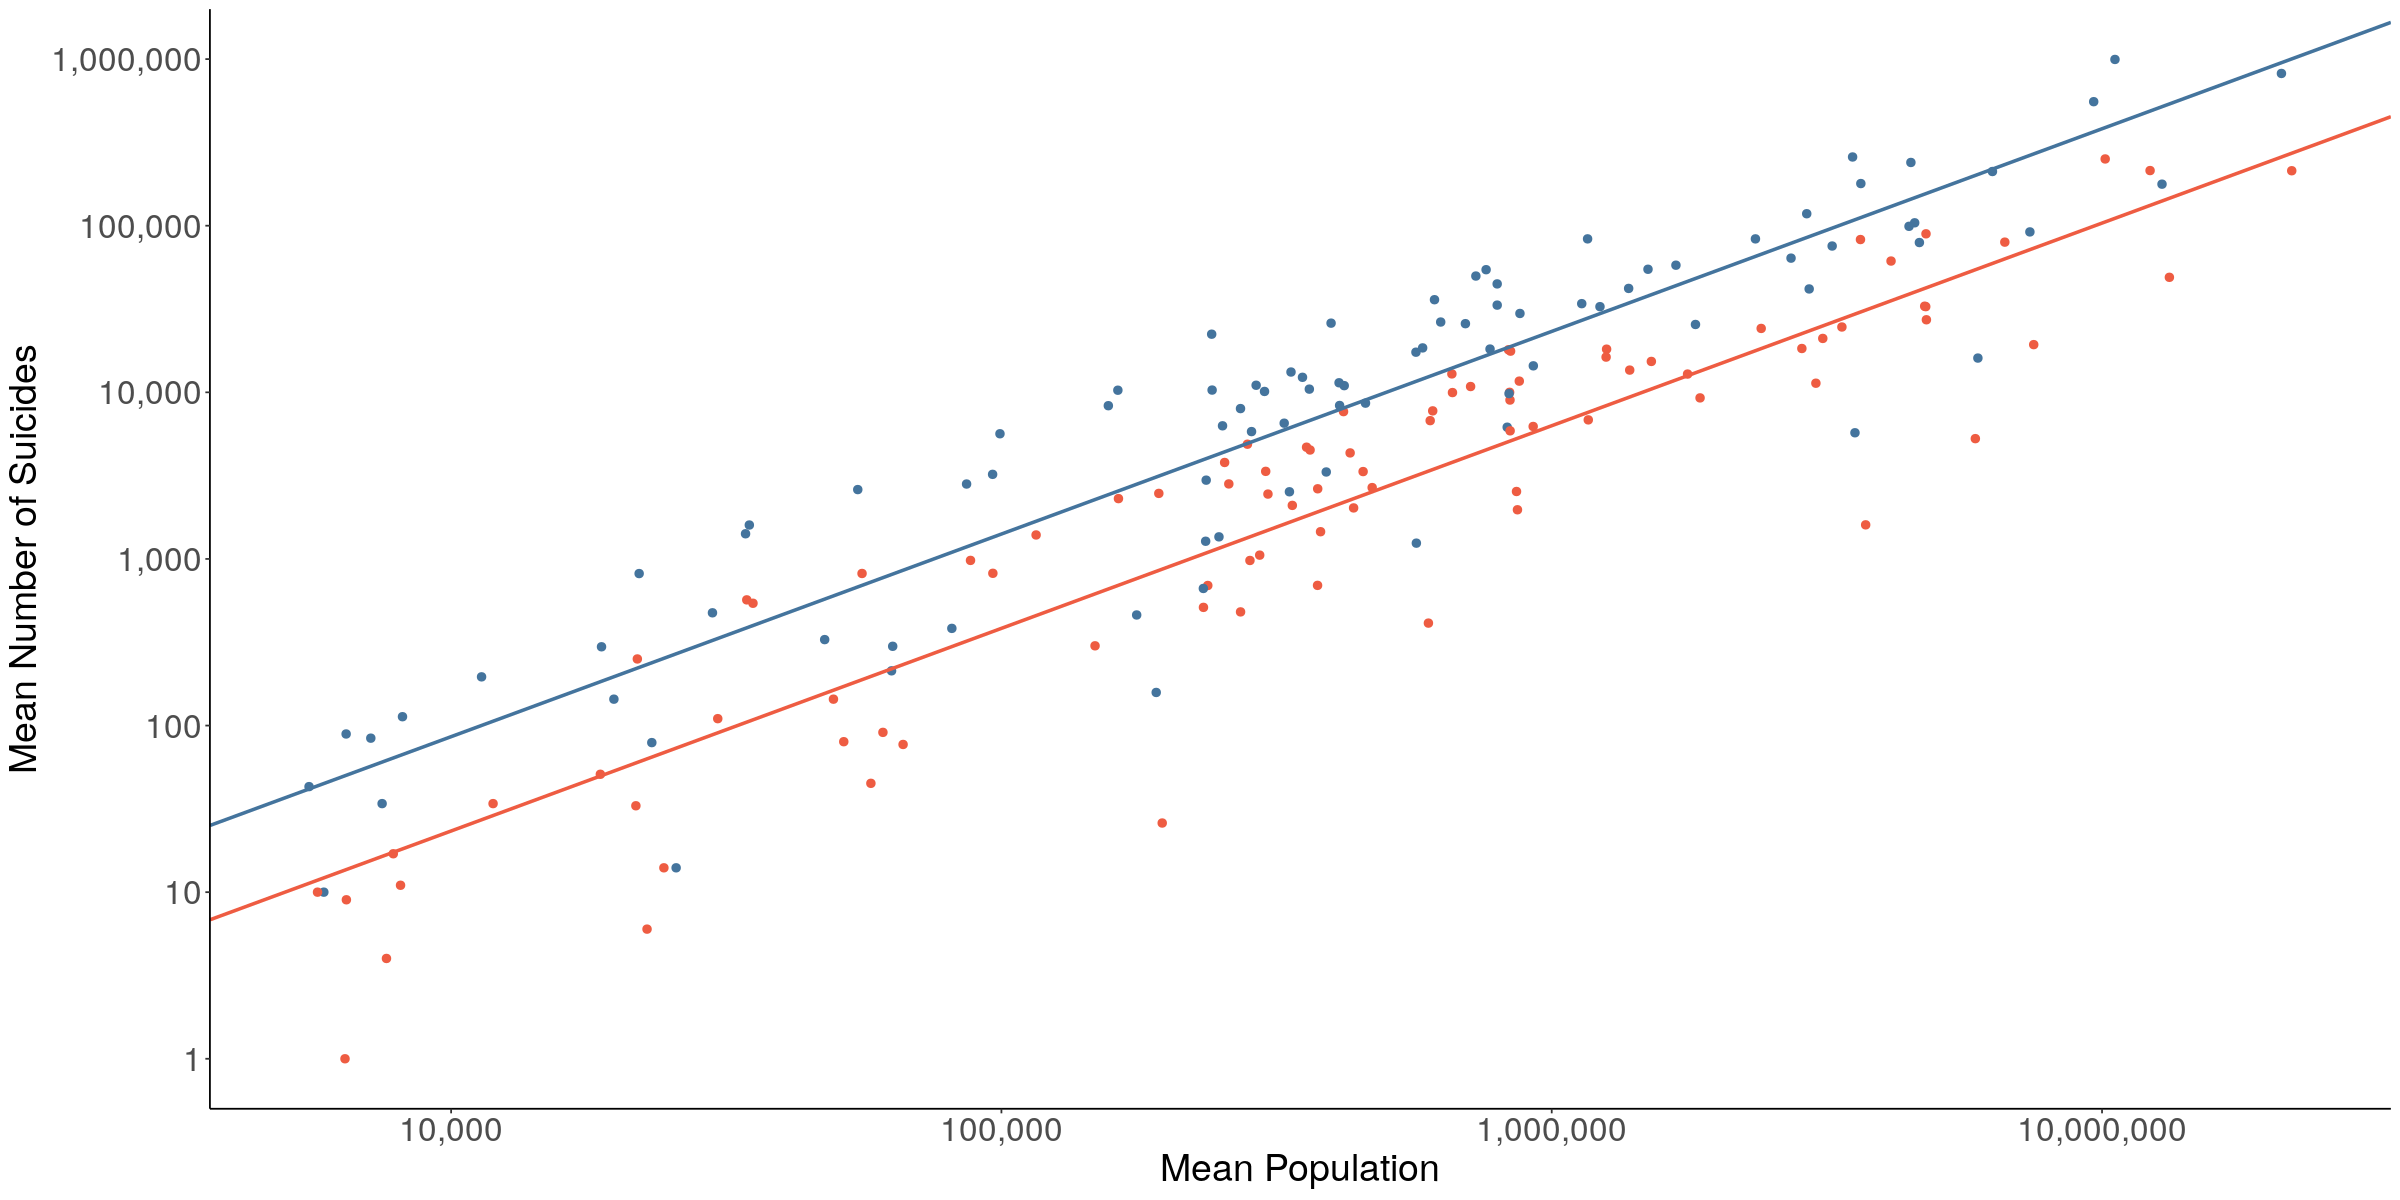

In [36]:
# sex_population_lm2 is the preferred model
summary(sex_population_lm2)

# calculate sex-specific intercepts
intercepts = c(coef(sex_population_lm2)['(Intercept)'],
               coef(sex_population_lm2)['(Intercept)'] + 
                 coef(sex_population_lm2)['sexmale'])
# data frame of slopes and intercepts for each sex
lines = data.frame(intercepts = intercepts,
                   slopes = rep(coef(sex_population_lm2)['log(population)'], 2),
                   sex = c('female', 'male'))

plot_sex_population_theme <- theme(axis.title = element_text(size = 22.5), 
                                  axis.text = element_text(size = 20),
                                  legend.position = 'none')

plot_sex_population <- ggplot(data = sex_population,
                              aes(x = population, y = suicides,
                                  col = sex)) +
  geom_point(lwd = 2) + # add data as points
  geom_abline(aes(intercept = intercepts, slope = slopes, colour = sex),
              lwd = 1,
              colour = c('tomato2', '#44749D'),
              data = lines) +
  # add regression lines
  theme_classic() + # white background, no gridlines
  xlab('Mean Population') + # change x axis label
  ylab('Mean Number of Suicides') + # change y axis label
  plot_sex_population_theme + # change the size of axis titles and axis text
  # and remove legend
  scale_colour_manual(values = c('tomato2', '#44749D')) +
  # change colour of points
  scale_x_continuous(trans = 'log',
                     breaks = c(10000, 100000, 1000000, 10000000),
                     labels = c('10,000', '100,000', '1,000,000', '10,000,000')) +
  scale_y_continuous(trans = 'log', 
                     breaks = c(1, 10, 100, 1000, 10000, 100000, 1000000),
                     labels = c('1', '10', '100', '1,000', '10,000', '100,000', 
                                '1,000,000'),
                     limits = c(1, 1000000))
  # log transform both axes, but use labels to show the actual values increasing by a power of 10

options(repr.plot.width = 20, repr.plot.height = 10)
plot_sex_population

Here we see two regression lines for each sex, with different *intercepts* but the same *slope*. On average for a given population of males and females, males will have a higher number of suicides than females, but there is **no significant difference** in the change in suicide rate between the sexes as their population increases.

## 3.4 GDP per capita
Finally, I'll investigate the effects of mean Gross Domestic Product (GDP) per capita on the number of suicides. GDP (*measured in US$*) is a measure of a country's economic productivity, it is the value of all the goods and services produced by a country during a specific period, in this case one year. GDP per capita is simply GDP divided by the population and is a measure of how much economic production value can be attributed to an average citizen. This means the mean GDP for a female and male will be the same, but as we've seen their suicide rate differs, so it will be useful to analyse if a change in mean GDP per capita can predict the suicide rate for a female better than male across countries. For this analysis, the number of suicides will be **log transformed**.



In [37]:
sex_gdp = suicide_data %>% # using suicide_data
  group_by(country, sex) %>% # group all the data from the same country
  # and sex
  dplyr::summarise(suicides = mean(sum(as.numeric(suicides_no))),
            gdp_per_capita = mean(as.numeric(gdp_per_capita)))
# create rows with the mean of the number of suicides and the mean of
# the gdp per capita, for each sex in each country across the time period

### 3.4.1 Females
A simple linear regression can determine if mean GDP per capita is a significant predictor of suicides in females:

In [38]:
# create a subset of sex_gdp with female data
female_gdp <- sex_gdp[which(sex_gdp$sex == 'female'),]
# perform linear regression
female_gdp_lm = lm(log(suicides) ~ gdp_per_capita, 
                   data = female_gdp)
summary(female_gdp_lm)


Call:
lm(formula = log(suicides) ~ gdp_per_capita, data = female_gdp)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.4355 -1.0943  0.3708  1.9401  4.9324 

Coefficients:
                 Estimate Std. Error t value            Pr(>|t|)    
(Intercept)    7.18919375 0.40050969   17.95 <0.0000000000000002 ***
gdp_per_capita 0.00002358 0.00001759    1.34               0.184    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.709 on 88 degrees of freedom
Multiple R-squared:   0.02,	Adjusted R-squared:  0.008868 
F-statistic: 1.796 on 1 and 88 DF,  p-value: 0.1836


GDP per capita is **not** a significant predictor of the number of female suicides, with a p-value **greater** than 0.05. An R-squared of 0.02 means that this model only explains **2%** of the variation in female suicides and the regression line does not fit the data well, as seen below:

`geom_smooth()` using formula 'y ~ x'



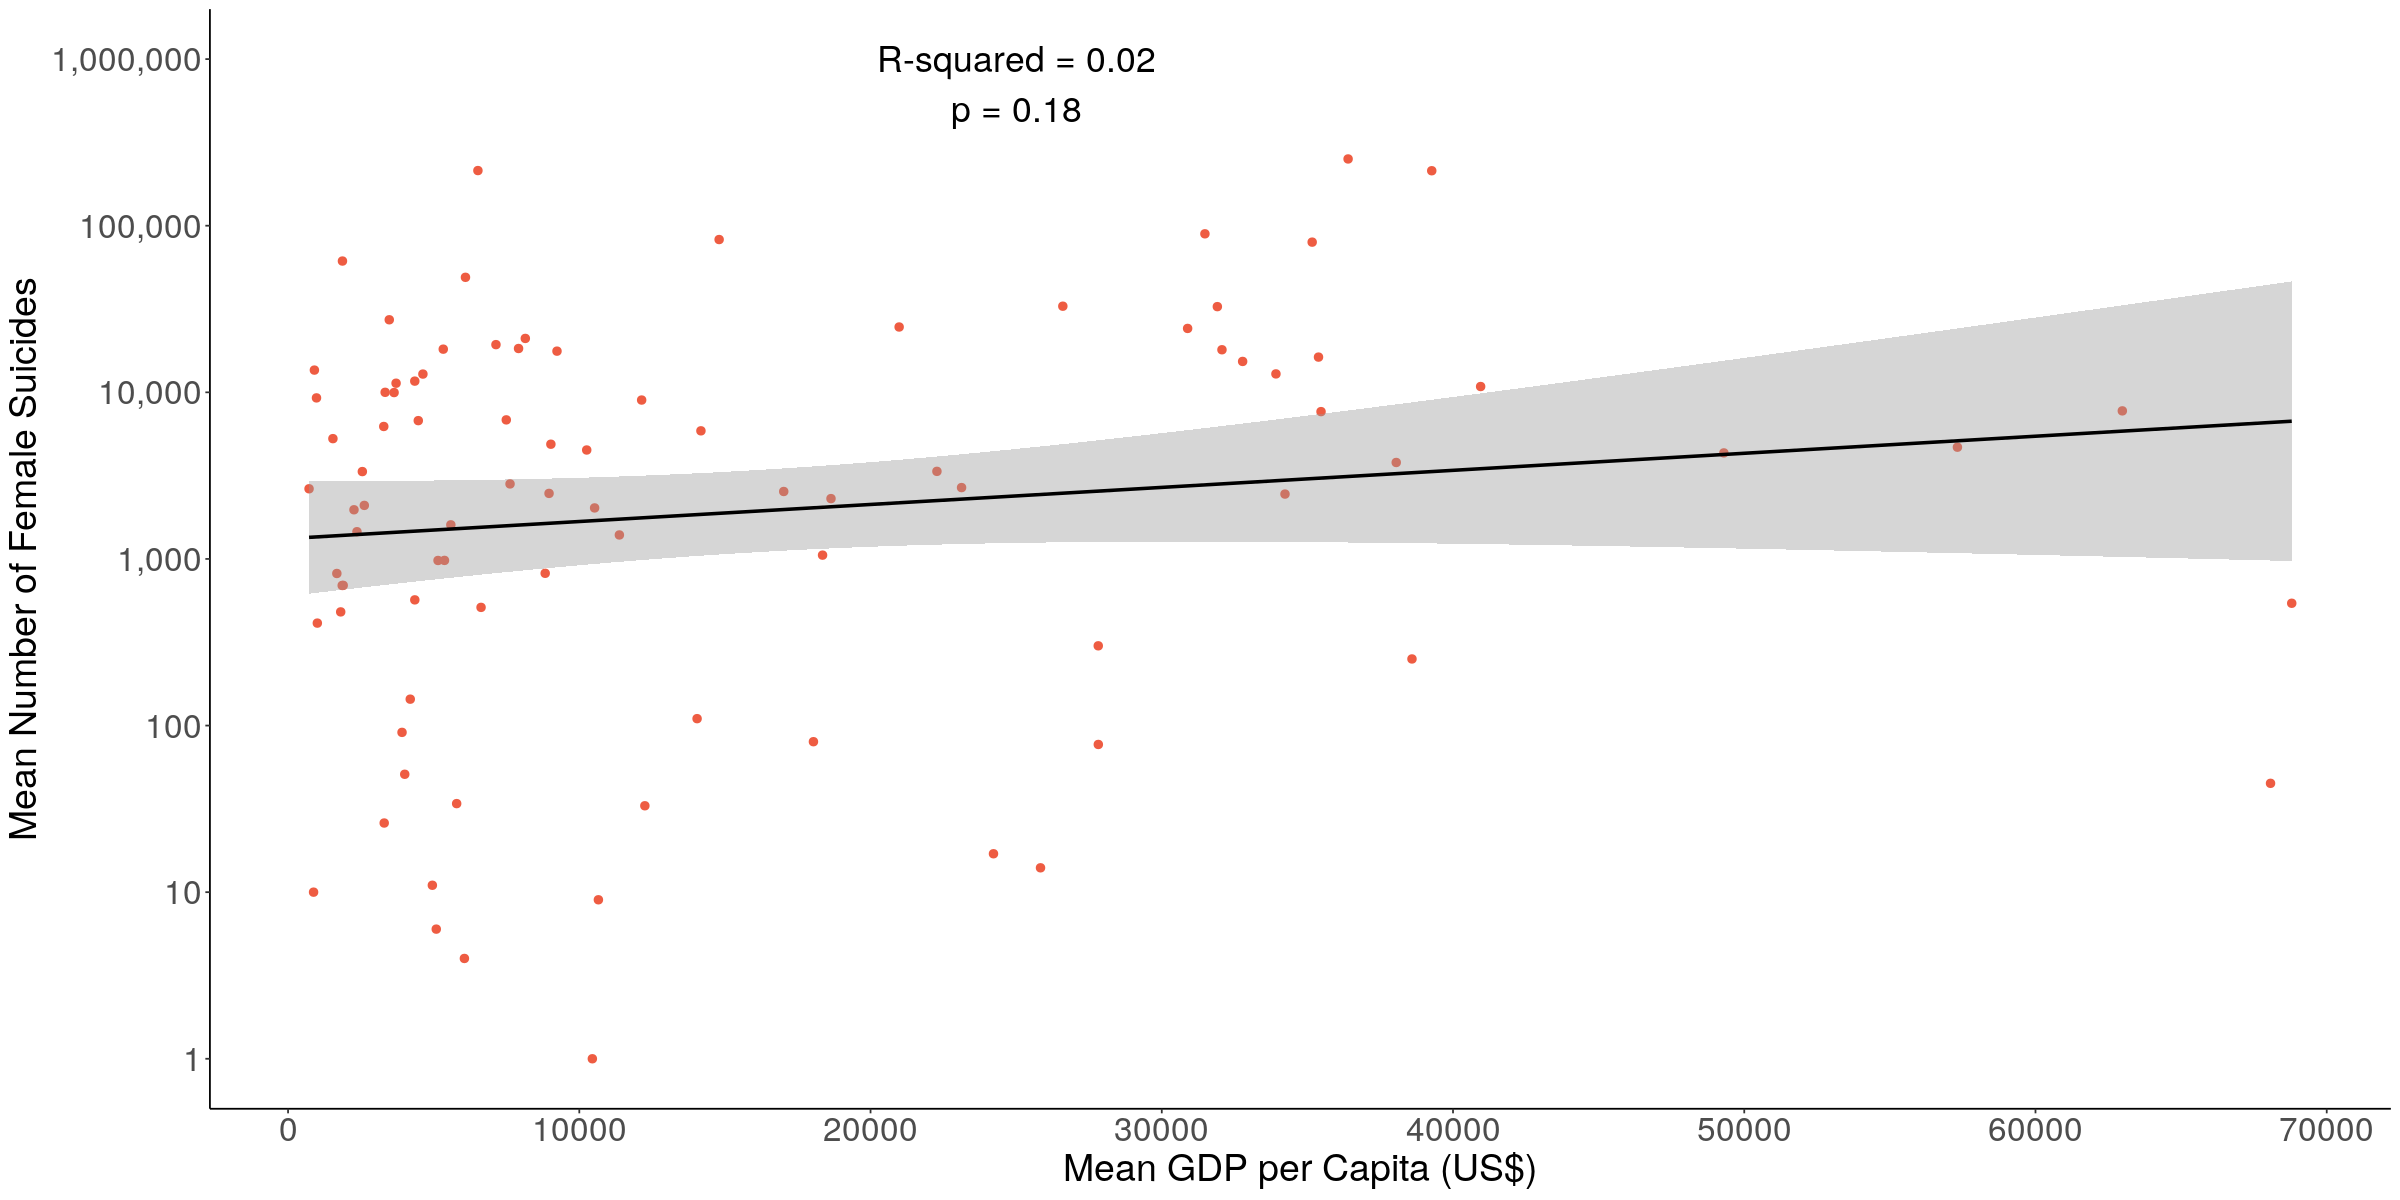

In [39]:
plot_female_gdp_theme <- theme(axis.title = element_text(size = 22.5), 
                               axis.text = element_text(size = 20))
plot_female_gdp <- ggplot(data = female_gdp, aes(x = gdp_per_capita, 
                                                 y = suicides)) +
  geom_point(lwd = 2, col = 'tomato2') +
  # add data as points
  geom_smooth(method = 'lm', col = 'black') + 
  # add regression line
  theme_classic() + # white background, no gridlines
  xlab('Mean GDP per Capita (US$)') + # change x axis label
  ylab('Mean Number of Female Suicides') + # change y axis label
  plot_female_gdp_theme + # change the size of axis titles and axis text
  annotate('text', x = 25000, y = 1000000, label = 'R-squared = 0.02', size = 7.5) +
  annotate('text', x = 25000, y = 500000, label = 'p = 0.18', size = 7.5) +
  # add text denoting the R-squared and p-value
  scale_x_continuous(breaks = c(seq(0, 70000, 10000)),
                     labels = c(seq(0, 70000, 10000))) +
  # change x axis labels
  scale_y_continuous(trans = 'log', 
                     breaks = c(1, 10, 100, 1000, 10000, 100000, 1000000),
                     labels = c('1', '10', '100', '1,000', '10,000', '100,000',
                                '1,000,000'),
                     limits = c(1, 1000000))
  # log transform y axis, but use labels to show the actual values increasing by a power of 10

options(repr.plot.width = 20, repr.plot.height = 10)
plot_female_gdp

There is no obvious relationship between mean GDP per capita and the mean number of female suicides, with the regression line failing to capture any of the data significantly.

### 3.4.1 Males
Let's see if this (lack of) relationship is the same for males:

In [40]:
# create a subset of sex_gdp with male data
male_gdp <- sex_gdp[which(sex_gdp$sex == 'male'),]
# perform linear regression
male_gdp_lm = lm(log(suicides) ~ gdp_per_capita, data = male_gdp)
summary(male_gdp_lm)


Call:
lm(formula = log(suicides) ~ gdp_per_capita, data = male_gdp)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4335 -1.3969  0.3309  1.7515  5.1533 

Coefficients:
                 Estimate Std. Error t value            Pr(>|t|)    
(Intercept)    8.52756872 0.37711372  22.613 <0.0000000000000002 ***
gdp_per_capita 0.00001995 0.00001656   1.205               0.232    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.551 on 88 degrees of freedom
Multiple R-squared:  0.01622,	Adjusted R-squared:  0.005046 
F-statistic: 1.451 on 1 and 88 DF,  p-value: 0.2315


GDP per capita is again **not** a significant predictor of the number of male suicides, with a p-value **greater** than 0.05. An R-squared of 0.016 means that this model explain even less of the variation in male suicides than the female model, with only **1.6%** of the variation explained:

`geom_smooth()` using formula 'y ~ x'



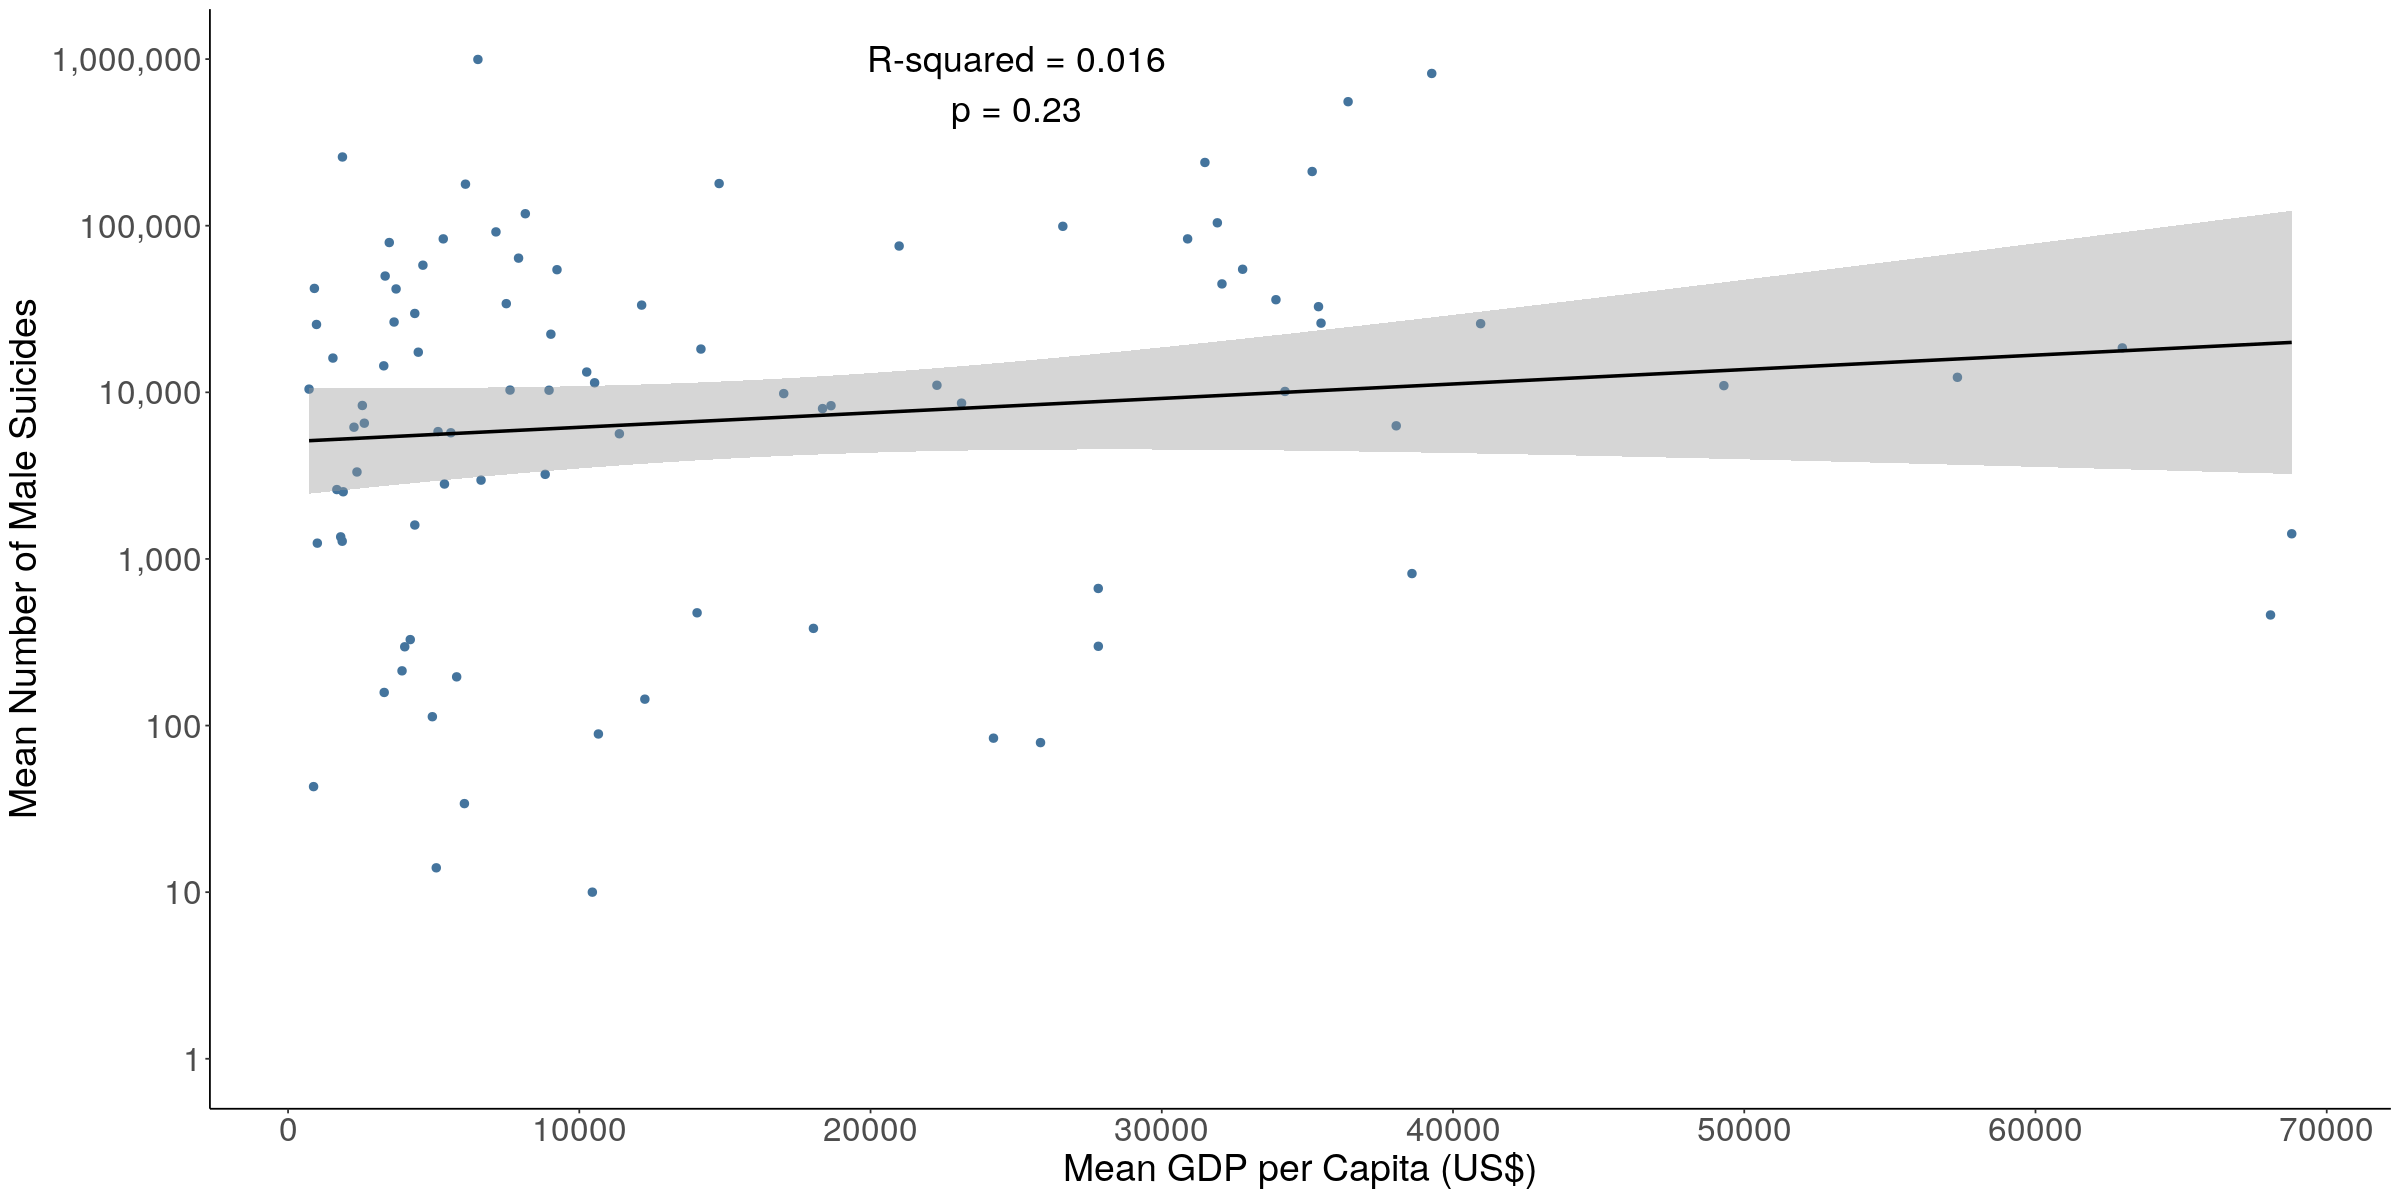

In [41]:
plot_male_gdp_theme <- theme(axis.title = element_text(size = 22.5), 
                             axis.text = element_text(size = 20))
plot_male_gdp <- ggplot(data = male_gdp, aes(x = gdp_per_capita, 
                                             y = suicides)) +
  geom_point(lwd = 2, col = '#44749D') +
  # add data as points
  geom_smooth(method = 'lm', col = 'black') + 
  # add regression line
  theme_classic() + # white background, no gridlines
  xlab('Mean GDP per Capita (US$)') + # change x axis label
  ylab('Mean Number of Male Suicides') + # change y axis label
  plot_male_gdp_theme + # change the size of axis titles and axis text
  annotate('text', x = 25000, y = 1000000, label = 'R-squared = 0.016', size = 7.5) +
  annotate('text', x = 25000, y = 500000, label = 'p = 0.23', size = 7.5) +
  # add text denoting the R-squared and p-value
  scale_x_continuous(breaks = c(seq(0, 70000, 10000)),
                     labels = c(seq(0, 70000, 10000))) +
  # change x axis labels
  scale_y_continuous(trans = 'log', 
                     breaks = c(1, 10, 100, 1000, 10000, 100000, 1000000),
                     labels = c('1', '10', '100', '1,000', '10,000', '100,000',
                                '1,000,000'),
                     limits = c(1, 1000000))
  # log transform y axis, but use labels to show the actual values 
  # increasing by a power of 10

options(repr.plot.width = 20, repr.plot.height = 10)
plot_male_gdp

As with the females, there is no obvious relationship between mean GDP per capita and the mean number of male suicides, with the regression line failing to capture any of the data significantly.

# 4. Conclusion

In **section 2.1**, I identified that globally the mean number of suicides per 100k population has been **declining** since a peak of **15.3** in 1995, and that the trend suggests the rate will reach and hopefully go lower than the previous lowest rates observed from 1985-1998 (*more up-to-date data could confirm this*).

In **section 2.2.1** I observed a noticable difference in the total number of suicides and the trend of the mean suicides per 100k population between each sex. Statistical analysis in **section 3.1** using an **unpaired two-samples Wilcoxon test** confirmed that there there is a **statistically significant difference** in the *median* number of female and male suicides.

In **section 2.2.2**, it became apparent that there were differences in the number of suicides between age groups *within* and *between* each sex. Suicide rates appeared to increase with age for both sexes, but the rate was decreasing for most age groups. By using the **Kruskal-Wallis test** in **section 3.2.1 and 3.2.2**, it was confirmed that there was a **statistically significant difference** in the *median* number of suicides for each age group, in females and males respectively. Furthermore, by utilising **pairwise comparisons using Wilcoxon rank sum test**, it was determined that each age group was different from each other in each sex. A model with age and sex as predictors failed the assumptions of a **two-way ANOVA**, but given that this dataset is quite large that might not be as significant, and a **multiple-pairwise comparison** using **TukeyHSD()** suggesting that each age group was **significantly different** from each other *between* the sexes.

In **section 3.3** I wanted to see if the number of suicides can be predicted by the size of the population of each sex and to see if the rate is different *between* each sex after controlling for their populations. A 1% increase in the female population results in an **increase of 1.25%** in the number of female suicides, with population size accounting for **85%** of the variation in the number of female suicides. This was slightly lower in males, with an **increase of 1.18%** in the number of suicides per 1% increase in the male population with an R-squared of **0.83**. In **section 3.3.3**, the best predictive model had a different *intercept* for each sex, but their *slopes* were the same, thereby concluding there is **no significant difference** in the change in suicide rate *between* the sexes as their respective populations increase.

Finally, GDP per capita was analysed as a predictor in **section 3.4**. However, it was *not* a significant predictor of the number of female or male suicides, with each model failing to capture more than 2% of the variation in the number of suicides for each sex.

If you've made it this far, thank you for taking the time and effort! 